# Introduction

____

<center><i>This notebook is part 1 of 2, focused on exploring and merging source data and engineering features. Please visit <a href='model.ipynb'>model.ipynb</a> for part 2, classification modeling</center></i>

____

<img src='./images/equity_equality.jpg'>

<center> Equality vs. equity <br> <i> <a href="interactioninstitute.org">Interaction Institute for Social Change</a> // Angus Maguire</i> </center>

**SUMMARY**

The purpose of this report is to study social, economic, and health inequities in the US and predict how those inequities influenced the spread and mortality of COVID-19 in a community/region. Predictions should be used to inform public policy and preparation for future pandemics/epidemics.

____

**STAKEHOLDERS**

Federal, state, and local governments and epidemiologists can use this analysis to shape public health policy and pandemic response plans. The goal is to learn from COVID-19 to prevent the loss that occurred in 2020-2021 from happening again.

____

**DATA SOURCES**

- [CDC’s Social Vulnerability Index](https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/SVI_documentation_2018.html)

- [CDC's Vaccine Hesitancy](https://data.cdc.gov/Vaccinations/Vaccine-Hesitancy-for-COVID-19-County-and-local-es/q9mh-h2tw)

- [The University of Wisconsin Population Health Institute's County Health Rankings](https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources) 

- [New York Times COVID Case and Death Counts](https://github.com/nytimes/covid-19-data)


____

**METHODS**

A multinomial classification model will predict a given region’s "degree of impact" of the pandemic (high, average, low). Feature importance and/or coefficients will be analyzed to recommend what may increase or decrease a community's vulnerability to extensive spread of illness and loss of life. 

____

**LOAD PACKAGES**

In [77]:
# style notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [78]:
#import standard packages
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

#import viz packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Data Load

## Compress

Data files downloaded from data.cdc.gov, Univ of Wisconsin Public Health Institute, and the New York Times are too large to push to github in their raw form, so the first step is to compress the files.

Original source files should be added to a .gitignore file when using Github.

**Social Vulnerability Index:**

In [79]:
## uncomment when running for the first time
## load source files and compress

# svi = pd.read_csv('data/SVI2018_US_COUNTY.csv')
# svi.to_csv('data_compressed/SVI2018_US_COUNTY.csv.gz', compression='gzip', index=False)
# svi.head()

In [80]:
# open compressed version and save as variable
svi = pd.read_csv('data_compressed/SVI2018_US_COUNTY.csv.gz', compression='gzip')
svi.head()

ST       STATE ST_ABBR      COUNTY   FIPS                       LOCATION  \
0  35  NEW MEXICO      NM  Rio Arriba  35039  Rio Arriba County, New Mexico   
1   1     ALABAMA      AL     Autauga   1001        Autauga County, Alabama   
2   1     ALABAMA      AL      Blount   1009         Blount County, Alabama   
3   1     ALABAMA      AL      Butler   1013         Butler County, Alabama   
4   1     ALABAMA      AL     Calhoun   1015        Calhoun County, Alabama   

     AREA_SQMI  E_TOTPOP  M_TOTPOP   E_HU  M_HU   E_HH  M_HH  E_POV  M_POV  \
0  5860.869195     39307         0  20044    71  12398   439   -999   -999   
1   594.443459     55200         0  23315    71  21115   383   8422   1137   
2   644.830460     57645         0  24222    55  20600   396   8220    992   
3   776.838201     20025         0  10026    51   6708   274   4640    521   
4   605.867251    115098         0  53682   184  45033   683  20819   1317   

   E_UNEMP  M_UNEMP  E_PCI  M_PCI  E_NOHSDP  M_NOHSDP  E_AGE65  M_AGE65  \
0     -999     -999   -999   -999      3669       426     7083       25   
1     1065      257  29372   2306      4204       475     8050       75   
2      909      193  22656    905      7861       727    10233       91   
3      567      147  20430   1258      2141       268     3806       21   
4     4628      526  24706    758     12620       766    19386      119   

   E_AGE17  M_AGE17  E_DISABL  M_DISABL  E_SNGPNT  M_SNGPNT  E_MINRTY  \
0     9318       14      6280       495      1330     285.0     34397   
1    13369       32     10465       729      1586     319.9     13788   
2    13468       53      8114       592      1437     267.2      7413   
3     4566       88      3492       370       704     143.9      9641   
4    25196       66     23598      1086      4701     464.0     31675   

   M_MINRTY  E_LIMENG  M_LIMENG  E_MUNIT  M_MUNIT  E_MOBILE  M_MOBILE  \
0     145.0       755     209.5       67     37.1      7770       431   
1      59.0       426     205.9      886    308.7      4279       469   
2     229.0       934     239.3      211    104.2      6108       476   
3      22.0        93     137.4      134     47.4      2625       212   
4      34.0      1076     250.2     1990    303.0      7904       546   

   E_CROWD  M_CROWD  E_NOVEH  M_NOVEH  E_GROUPQ  M_GROUPQ  EP_POV  MP_POV  \
0      264     77.1      763      160       654       142  -999.0  -999.0   
1      299    142.3     1191      272       546       161    15.4     2.1   
2      339    130.7      856      201       543       117    14.4     1.7   
3      119     57.7      520      102       322        88    23.5     2.6   
4      772    206.2     2599      331      3112       436    18.6     1.2   

   EP_UNEMP  MP_UNEMP   EP_PCI  MP_PCI  EP_NOHSDP  MP_NOHSDP  EP_AGE65  \
0    -999.0    -999.0   -999.0  -999.0       13.8        1.6      18.0   
1       4.2       1.0  29372.0  2306.0       11.3        1.3      14.6   
2       4.1       0.8  22656.0   905.0       19.8        1.8      17.8   
3       6.7       1.7  20430.0  1258.0       15.4        1.9      19.0   
4       8.8       1.0  24706.0   758.0       15.9        1.0      16.8   

   MP_AGE65  EP_AGE17  MP_AGE17  EP_DISABL  MP_DISABL  EP_SNGPNT  MP_SNGPNT  \
0       0.1      23.7       0.0       16.1        1.3       10.7        2.3   
1       0.1      24.2       0.1       19.3        1.3        7.5        1.5   
2       0.2      23.4       0.1       14.2        1.0        7.0        1.3   
3       0.1      22.8       0.4       17.7        1.9       10.5        2.1   
4       0.1      21.9       0.1       20.8        0.9       10.4        1.0   

   EP_MINRTY  MP_MINRTY  EP_LIMENG  MP_LIMENG  EP_MUNIT  MP_MUNIT  EP_MOBILE  \
0       87.5        0.4        2.1        0.6       0.3       0.2       38.8   
1       25.0        0.1        0.8        0.4       3.8       1.3       18.4   
2       12.9        0.4        1.7        0.4       0.9       0.4       25.2   
3       48.1        0.1    

**Vaccine Hesitancy:**

In [81]:
## uncomment when running for the first time
## load source files and compress

# vax_hesitancy = pd.read_csv('data/Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv')
# vax_hesitancy.to_csv('data_compressed/Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv.gz', 
#                     compression='gzip', index=False)

In [82]:
# open compressed version and save as variable

vax_hesitancy = pd.read_csv('data_compressed/Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv.gz')
vax_hesitancy.head()

FIPS Code                 County Name    State  Estimated hesitant  \
0       1123  Tallapoosa County, Alabama  ALABAMA              0.1806   
1       1121   Talladega County, Alabama  ALABAMA              0.1783   
2       1131      Wilcox County, Alabama  ALABAMA              0.1735   
3       1129  Washington County, Alabama  ALABAMA              0.1735   
4       1133     Winston County, Alabama  ALABAMA              0.1805   

   Estimated hesitant or unsure  Estimated strongly hesitant  \
0                        0.2400                       0.1383   
1                        0.2350                       0.1368   
2                        0.2357                       0.1337   
3                        0.2357                       0.1337   
4                        0.2313                       0.1379   

   Social Vulnerability Index (SVI)             SVI Category  \
0                              0.89  Very High Vulnerability   
1                              0.87  Very High Vulnerability   
2                              0.93  Very High Vulnerability   
3                              0.73       High Vulnerability   
4                              0.70       High Vulnerability   

   CVAC level of concern for vaccination rollout CVAC Level Of Concern  \
0                                           0.64          High Concern   
1                                           0.84     Very High Concern   
2                                           0.94     Very High Concern   
3                                           0.82     Very High Concern   
4                                           0.80          High Concern   

   Percent adults fully vaccinated against COVID-19 (as of 6/10/21)  \
0                                              0.305                  
1                                              0.265                  
2                                              0.394                  
3                                              0.308                  
4                                              0.163                  

   Percent Hispanic  Percent non-Hispanic American Indian/Alaska Native  \
0            0.0242                                             0.0022    
1            0.0229                                             0.0043    
2            0.0053                                             0.0009    
3            0.0146                                             0.0731    
4            0.0315                                             0.0034    

   Percent non-Hispanic Asian  Percent non-Hispanic Black  \
0                      0.0036                      0.2697   
1                      0.0061                      0.3237   
2                      0.0003                      0.6938   
3                      0.0025                      0.2354   
4                      0.0016                      0.0073   

   Percent non-Hispanic Native Hawaiian/Pacific Islander  \
0                                             0.0000       
1                                             0.0003       
2                                             0.0000       
3                                             0.0000       
4                                             0.0005       

   Percent non-Hispanic White            Geographical Point State Code  \
0                      0.6887  POINT (-86.844516 32.756889)         AL   
1                      0.6263  POINT (-86.844516 32.756889)         AL   
2                      0.2684  POINT (-86.844516 32.756889)         AL   
3                      0.6495  POINT (-86.844516 32.756889)         AL   
4                      0.9370  POINT (-86.844516 32.756889)         AL   

                                     County Boundary  \
0  MULTIPOLYGON (((-85.841259 33.104456, -85.8409...   
1  MULTIPOLYGON (((-86.303069 33.46316, -86.30306...   
2  MULTIPOLYGON (((-87.52534299999999 32.132773, ...   
3  MULTIPOLYGON (((-88.45317899999999 31.505388, ...   
4  MULTIPOLYGON ((

**County Health Rankings:**

In [83]:
## uncomment when running for the first time
## load source files and compress

# county_health_rankings = pd.read_csv('data/countyhealthrankings-analytic_data2021.csv', header=[0,1])
# county_health_rankings.to_csv('data_compressed/countyhealthrankings-analytic_data2021.csv.gz', compression='gzip',
#                              index=False)

In [84]:
# open compressed version and save as variable

county_health_rankings = pd.read_csv('data_compressed/countyhealthrankings-analytic_data2021.csv.gz', 
                                     compression='gzip', header=[0,1])
county_health_rankings.head()

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
        statecode       countycode          fipscode              state   
0               0                0                 0                 US   
1               1                0              1000                 AL   
2               1                1              1001                 AL   
3               1                3              1003                 AL   
4               1                5              1005                 AL   

             Name Release Year County Ranked (Yes=1/No=0)  \
           county         year              county_ranked   
0   United States         2021                        NaN   
1         Alabama         2021                        NaN   
2  Autauga County         2021                        1.0   
3  Baldwin County         2021                        1.0   
4  Barbour County         2021                        1.0   

  Premature death raw value Premature death numerator  \
              v001_rawvalue            v001_numerator   
0               6906.641094                 3854074.0   
1               9819.887431                   82249.0   
2               7830.053484                     787.0   
3               7680.477270                    3147.0   
4              11476.629416                     515.0   

  Premature death denominator Premature death CI low Premature death CI high  \
             v001_denominator             v001_cilow             v001_cihigh   
0                 915437195.0            6896.349078             6916.933110   
1                  13651801.0            9718.253592             9921.521270   
2                    155765.0            6997.660326             8662.446641   
3                    600539.0            7236.921021             8124.033519   
4                     69011.0            9907.793139            13045.465692   

  Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)  \
                                                     v001_flag   
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

  Premature death (AIAN) Premature death CI low (AIAN)  \
          v001_race_aian          v001_race_aian_cilow   
0           11696.312920                  11548.968920   
1            5145.190874                   4094.030025   
2                    NaN                           NaN   
3                    NaN                           NaN   
4                    NaN                           NaN   

  Premature death CI high (AIAN)  \
           v001_race_aian_cihigh   
0                   11843.656920   
1                    6196.351723   
2                            NaN   
3                            NaN   
4                            NaN   

  Premature death flag (AIAN) (. = No Flag/1=Unreliable/2=Suppressed)  \
                                                  v001_race_aian_flag   
0                                                NaN                    
1                                                NaN                    
2                                                2.0                    
3                                                2.0                    
4                                                2.0                    

  Premature death (Asian/Pacific Islander)  \
                           v001_race_asian   
0                              3159.885747   
1                              3382.761714   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  Premature death CI low (Asian/Pacific Islander)  \
                            v001_race_asian_cilow   
0                      

**NYT COVID-19 Case & Death Counts:**

In [85]:
# #uncomment when running for the first time
# nyt_cases_deaths = pd.read_csv('data/NYT-covid-cases-deaths.csv')
# nyt_cases_deaths.to_csv('data_compressed/NYT-covid-cases-deaths.csv.gz', index=False, compression='gzip')

In [86]:
# open compressed version and save as variable

nyt_cases_deaths = pd.read_csv('data_compressed/NYT-covid-cases-deaths.csv.gz', compression='gzip')
nyt_cases_deaths

date      county    state     fips  cases  deaths  \
0     2021-07-07     Autauga  Alabama   1001.0   7262   113.0   
1     2021-07-07     Baldwin  Alabama   1003.0  22043   315.0   
2     2021-07-07     Barbour  Alabama   1005.0   2347    60.0   
3     2021-07-07        Bibb  Alabama   1007.0   2693    64.0   
4     2021-07-07      Blount  Alabama   1009.0   6988   139.0   
...          ...         ...      ...      ...    ...     ...   
3241  2021-07-07  Sweetwater  Wyoming  56037.0   4801    40.0   
3242  2021-07-07       Teton  Wyoming  56039.0   3804    11.0   
3243  2021-07-07       Uinta  Wyoming  56041.0   2325    13.0   
3244  2021-07-07    Washakie  Wyoming  56043.0    926    26.0   
3245  2021-07-07      Weston  Wyoming  56045.0    661     6.0   

      confirmed_cases  confirmed_deaths  probable_cases  probable_deaths  
0              6082.0             101.0          1180.0             12.0  
1             15543.0             238.0          6500.0             77.0  
2              1316.0              42.0          1031.0             18.0  
3              2158.0              40.0           535.0             24.0  
4              5357.0             118.0          1631.0             21.0  
...               ...               ...             ...              ...  
3241           4553.0               NaN           248.0              NaN  
3242           3715.0               NaN            89.0              NaN  
3243           1995.0               NaN           330.0              NaN  
3244            725.0               NaN           201.0              NaN  
3245            549.0               NaN           112.0              NaN  

[3246 rows x 10 columns]

# Explore Data Sources

Each file will now be explored and basic preprocessing steps like indexing, relabeling, setting data types, and dropping unnecessary features will be completed.


## Social Vulnerability Index 

Source: [CDC SVI 2018 Documentation](https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/SVI_documentation_2018.html)

<i>Centers for Disease Control and Prevention/ Agency for Toxic Substances and Disease Registry/ Geospatial Research, Analysis, and Services Program. CDC/ATSDR Social Vulnerability Index 2018 Database US. https://www.atsdr.cdc.gov/placeandhealth/svi/data_documentation_download.html. Accessed on July 7, 2021.</i>

The degree to which a community exhibits certain social conditions, including high poverty, low percentage of vehicle access, or crowded households, may affect that community’s ability to prevent human suffering and financial loss in the event of disaster. These factors describe a community’s *social vulnerability.*

The Social Vulnerability Index (SVI) was created by the CDC to help public health officials and emergency response planners identify and map the communities that will most likely need support before, during, and after a hazardous event. While usually ranked at the US Census tract level, SVI 2018, used in this analysis, ranks at the county level. Each county received a ranking for each of the 15 social factors, for each of the four themes, as well as one overall ranking. 

Variables used:
<img src='images/SVI_variables.jpg'>

<center> Social Vulnerability Index Measures <br> <i> Source: <a href="https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/SVI_documentation_2018.html">CDC ATSDR</a></i></center>

In [87]:
display(svi.head())
display(svi.info())

ST       STATE ST_ABBR      COUNTY   FIPS                       LOCATION  \
0  35  NEW MEXICO      NM  Rio Arriba  35039  Rio Arriba County, New Mexico   
1   1     ALABAMA      AL     Autauga   1001        Autauga County, Alabama   
2   1     ALABAMA      AL      Blount   1009         Blount County, Alabama   
3   1     ALABAMA      AL      Butler   1013         Butler County, Alabama   
4   1     ALABAMA      AL     Calhoun   1015        Calhoun County, Alabama   

     AREA_SQMI  E_TOTPOP  M_TOTPOP   E_HU  M_HU   E_HH  M_HH  E_POV  M_POV  \
0  5860.869195     39307         0  20044    71  12398   439   -999   -999   
1   594.443459     55200         0  23315    71  21115   383   8422   1137   
2   644.830460     57645         0  24222    55  20600   396   8220    992   
3   776.838201     20025         0  10026    51   6708   274   4640    521   
4   605.867251    115098         0  53682   184  45033   683  20819   1317   

   E_UNEMP  M_UNEMP  E_PCI  M_PCI  E_NOHSDP  M_NOHSDP  E_AGE65  M_AGE65  \
0     -999     -999   -999   -999      3669       426     7083       25   
1     1065      257  29372   2306      4204       475     8050       75   
2      909      193  22656    905      7861       727    10233       91   
3      567      147  20430   1258      2141       268     3806       21   
4     4628      526  24706    758     12620       766    19386      119   

   E_AGE17  M_AGE17  E_DISABL  M_DISABL  E_SNGPNT  M_SNGPNT  E_MINRTY  \
0     9318       14      6280       495      1330     285.0     34397   
1    13369       32     10465       729      1586     319.9     13788   
2    13468       53      8114       592      1437     267.2      7413   
3     4566       88      3492       370       704     143.9      9641   
4    25196       66     23598      1086      4701     464.0     31675   

   M_MINRTY  E_LIMENG  M_LIMENG  E_MUNIT  M_MUNIT  E_MOBILE  M_MOBILE  \
0     145.0       755     209.5       67     37.1      7770       431   
1      59.0       426     205.9      886    308.7      4279       469   
2     229.0       934     239.3      211    104.2      6108       476   
3      22.0        93     137.4      134     47.4      2625       212   
4      34.0      1076     250.2     1990    303.0      7904       546   

   E_CROWD  M_CROWD  E_NOVEH  M_NOVEH  E_GROUPQ  M_GROUPQ  EP_POV  MP_POV  \
0      264     77.1      763      160       654       142  -999.0  -999.0   
1      299    142.3     1191      272       546       161    15.4     2.1   
2      339    130.7      856      201       543       117    14.4     1.7   
3      119     57.7      520      102       322        88    23.5     2.6   
4      772    206.2     2599      331      3112       436    18.6     1.2   

   EP_UNEMP  MP_UNEMP   EP_PCI  MP_PCI  EP_NOHSDP  MP_NOHSDP  EP_AGE65  \
0    -999.0    -999.0   -999.0  -999.0       13.8        1.6      18.0   
1       4.2       1.0  29372.0  2306.0       11.3        1.3      14.6   
2       4.1       0.8  22656.0   905.0       19.8        1.8      17.8   
3       6.7       1.7  20430.0  1258.0       15.4        1.9      19.0   
4       8.8       1.0  24706.0   758.0       15.9        1.0      16.8   

   MP_AGE65  EP_AGE17  MP_AGE17  EP_DISABL  MP_DISABL  EP_SNGPNT  MP_SNGPNT  \
0       0.1      23.7       0.0       16.1        1.3       10.7        2.3   
1       0.1      24.2       0.1       19.3        1.3        7.5        1.5   
2       0.2      23.4       0.1       14.2        1.0        7.0        1.3   
3       0.1      22.8       0.4       17.7        1.9       10.5        2.1   
4       0.1      21.9       0.1       20.8        0.9       10.4        1.0   

   EP_MINRTY  MP_MINRTY  EP_LIMENG  MP_LIMENG  EP_MUNIT  MP_MUNIT  EP_MOBILE  \
0       87.5        0.4        2.1        0.6       0.3       0.2       38.8   
1       25.0        0.1        0.8        0.4       3.8       1.3       18.4   
2       12.9        0.4        1.7        0.4       0.9       0.4       25.2   
3       48.1        0.1    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Columns: 123 entries, ST to E_DAYPOP
dtypes: float64(63), int64(56), object(4)
memory usage: 2.9+ MB


None

In [88]:
# check for duplicate fips value
svi.FIPS.value_counts().sort_values()

47103    1
47071    1
47089    1
47101    1
47099    1
        ..
47111    1
47109    1
47107    1
47105    1
8115     1
Name: FIPS, Length: 3142, dtype: int64

In [89]:
# set fips code as index
svi.set_index('FIPS', inplace=True)

SVI contains 123 columns of extensive data in various forms, margins of error, and flags generated from processing American Community Survey (ACS) results.

For this analysis, I decided to drop the following columns:
- Raw values before controlling for population ("E_")
- Percentile rankings for each variable, instead opting to use the population-controlled percentages ("EPL_" and "SPL_")
- Margins of error ("M_" and "MP_")
- Flags ("F_")
- Housing and household composition features, instead opting to use the aggregated theme index

Notes:
- Per capita income ("PCI") is population controlled by nature, so the values in EP_PCI are equal to those in E_PCI

In [90]:
# drop columns
svi_drops = ['ST', 'LOCATION', 
             'M_TOTPOP',  'M_HU', 'M_HH', 'M_POV', 'M_UNEMP', 'M_PCI', 'M_NOHSDP',
             'M_AGE65', 'M_AGE17', 'M_DISABL', 'M_SNGPNT', 'M_MINRTY', 'M_LIMENG', 'M_MUNIT',
             'M_MOBILE', 'M_CROWD', 'M_NOVEH', 'M_GROUPQ','M_UNINSUR', 'MP_UNINSUR', 
             'MP_POV', 'MP_UNEMP', 'MP_PCI', 'MP_NOHSDP', 'MP_AGE65', 'MP_AGE17', 
             'MP_DISABL', 'MP_SNGPNT', 'MP_MINRTY', 'MP_LIMENG', 'MP_MUNIT', 'MP_MOBILE', 
             'MP_CROWD', 'MP_NOVEH', 'MP_GROUPQ',
             'EP_PCI', 
             'E_POV', 'E_UNEMP', 'E_NOHSDP', 'E_AGE65', 'E_AGE17', 'E_DISABL', 'E_SNGPNT', 
             'E_MINRTY', 'E_LIMENG', 'E_MUNIT', 'E_MOBILE', 'E_CROWD', 'E_NOVEH', 'E_GROUPQ', 'E_UNINSUR', 
             'E_DAYPOP',
             'EPL_POV', 'EPL_UNEMP', 'EPL_PCI', 'EPL_NOHSDP', 'SPL_THEME1', 'EPL_AGE65', 'EPL_AGE17',
             'EPL_DISABL', 'EPL_SNGPNT', 'SPL_THEME2', 'EPL_MINRTY', 'EPL_LIMENG', 'SPL_THEME3',
             'EPL_MUNIT', 'EPL_MOBILE', 'EPL_CROWD', 'EPL_NOVEH', 'EPL_GROUPQ', 'SPL_THEME4',
             'SPL_THEMES', 
             'F_POV', 'F_UNEMP', 'F_PCI', 'F_NOHSDP', 'F_THEME1', 'F_AGE65',
             'F_AGE17', 'F_DISABL', 'F_SNGPNT', 'F_THEME2', 'F_MINRTY', 'F_LIMENG', 'F_THEME3',
             'F_MUNIT', 'F_MOBILE', 'F_CROWD', 'F_NOVEH', 'F_GROUPQ', 'F_THEME4', 'F_TOTAL',
             'EP_DISABL', 'EP_SNGPNT', 'EP_MINRTY', 'EP_LIMENG', 'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 
             'EP_NOVEH', 'EP_GROUPQ' 
            ]

svi.drop(columns=svi_drops, inplace=True)

In [91]:
# uncode feature names for easier interpretability
svi_mapper = {'E_TOTPOP': 'population',
              'E_HU': 'housing units count',
              'E_HH': 'households count',
              'E_PCI': 'per capita income',
              'EP_POV': 'poverty rate',
              'EP_UNEMP': 'unemployment rate',
              'EP_NOHSDP': '% adults without hs diploma', 
              'EP_AGE65': '% population >65',
              'EP_AGE17': '% population <17',
              'EP_UNINSUR': '% population uninsured',
              'RPL_THEME1': 'SVI socioeconomic ranking',
              'RPL_THEME2': 'SVI household composition and disability ranking',
              'RPL_THEME3': 'SVI minority status and language ranking',
              'RPL_THEME4': 'SVI housing type and transportation ranking',
              'RPL_THEMES': 'SVI overall ranking'}
svi.rename(axis=1, mapper=svi_mapper, inplace=True)

I imagine population density might be a key metric to understand communities' risk of spreading an illness more extensively, so I'll engineer a population density feature by dividing population into square mileage.

In [92]:
# Engineer a feature called "population_density" that represents the number of people per square mile
svi['population density (pop per sqmi)'] = svi['population'] / svi['AREA_SQMI']
svi['population density (pop per sqmi)'].describe()

count     3142.000000
mean       270.678668
std       1803.519578
min          0.037198
25%         16.689431
50%         44.719178
75%        116.710171
max      72052.993377
Name: population density (pop per sqmi), dtype: float64

Finally, I will limit the analysis to the 50 US states + DC.

In [93]:
#check if Puerto Rico and other US territories are included; if so, drop
print(len(svi.STATE.unique()))
svi.STATE.unique()

51


array(['NEW MEXICO', 'ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS',
       'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'FLORIDA',
       'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS',
       'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS',
       'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA',
       'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING', 'HAWAII',
       'DISTRICT OF COLUMBIA'], dtype=object)

Next step is to address null values. In this dataset, nulls have been filled with the value -999.

In [94]:
# find features with min values of -999
svi.describe().round().loc['min']

AREA_SQMI                                             2.0
population                                           75.0
housing units count                                  70.0
households count                                     33.0
per capita income                                  -999.0
poverty rate                                       -999.0
unemployment rate                                  -999.0
% adults without hs diploma                           1.0
% population >65                                      4.0
% population <17                                      5.0
SVI socioeconomic ranking                          -999.0
SVI household composition and disability ranking      0.0
SVI minority status and language ranking              0.0
SVI housing type and transportation ranking           0.0
SVI overall ranking                                -999.0
% population uninsured                                2.0
population density (pop per sqmi)                     0.0
Name: min, dty

The following features need to be addressed:
- per capita income
- poverty rate
- unemployment rate
- svi socioeconomic ranking
- svi overall ranking

In [95]:
#address per capita income feature
svi[svi['per capita income'] == -999]

STATE ST_ABBR      COUNTY    AREA_SQMI  population  \
FIPS                                                             
35039  NEW MEXICO      NM  Rio Arriba  5860.869195       39307   

       housing units count  households count  per capita income  poverty rate  \
FIPS                                                                            
35039                20044             12398               -999        -999.0   

       unemployment rate  % adults without hs diploma  % population >65  \
FIPS                                                                      
35039             -999.0                         13.8              18.0   

       % population <17  SVI socioeconomic ranking  \
FIPS                                                 
35039              23.7                     -999.0   

       SVI household composition and disability ranking  \
FIPS                                                      
35039                                            0.8758   

       SVI minority status and language ranking  \
FIPS                                              
35039                                    0.9268   

       SVI housing type and transportation ranking  SVI overall ranking  \
FIPS                                                                      
35039                                       0.5409               -999.0   

       % population uninsured  population density (pop per sqmi)  
FIPS                                                              
35039                    10.6                           6.706684

In [96]:
#set value as NM's median per capita income
svi.loc[(svi['per capita income'] == -999), 'per capita income'] =\
                        svi.loc[(svi.STATE == 'NEW MEXICO'), 'per capita income'].median()

In [97]:
svi.loc[(svi.STATE == 'NEW MEXICO'), 'per capita income'].median()

21934.0

In [98]:
#validate
print(svi.loc[(svi.STATE == 'NEW MEXICO'), 'per capita income'].median())
svi.iloc[0]

21934.0


STATE                                               NEW MEXICO
ST_ABBR                                                     NM
COUNTY                                              Rio Arriba
AREA_SQMI                                              5860.87
population                                               39307
housing units count                                      20044
households count                                         12398
per capita income                                        21934
poverty rate                                              -999
unemployment rate                                         -999
% adults without hs diploma                               13.8
% population >65                                            18
% population <17                                          23.7
SVI socioeconomic ranking                                 -999
SVI household composition and disability ranking        0.8758
SVI minority status and language ranking               

In [99]:
#address poverty rate feature
svi.loc[(svi['poverty rate'] == -999)]

STATE ST_ABBR      COUNTY    AREA_SQMI  population  \
FIPS                                                             
35039  NEW MEXICO      NM  Rio Arriba  5860.869195       39307   

       housing units count  households count  per capita income  poverty rate  \
FIPS                                                                            
35039                20044             12398            21934.0        -999.0   

       unemployment rate  % adults without hs diploma  % population >65  \
FIPS                                                                      
35039             -999.0                         13.8              18.0   

       % population <17  SVI socioeconomic ranking  \
FIPS                                                 
35039              23.7                     -999.0   

       SVI household composition and disability ranking  \
FIPS                                                      
35039                                            0.8758   

       SVI minority status and language ranking  \
FIPS                                              
35039                                    0.9268   

       SVI housing type and transportation ranking  SVI overall ranking  \
FIPS                                                                      
35039                                       0.5409               -999.0   

       % population uninsured  population density (pop per sqmi)  
FIPS                                                              
35039                    10.6                           6.706684

In [100]:
#set value as NM's median per capita income
svi.loc[(svi['poverty rate'] == -999), 'poverty rate'] =\
                        svi.loc[(svi.STATE == 'NEW MEXICO'), 'poverty rate'].median()

In [101]:
#address unemployment rate feature
svi.loc[(svi['unemployment rate'] == -999)]

STATE ST_ABBR      COUNTY    AREA_SQMI  population  \
FIPS                                                             
35039  NEW MEXICO      NM  Rio Arriba  5860.869195       39307   

       housing units count  households count  per capita income  poverty rate  \
FIPS                                                                            
35039                20044             12398            21934.0          20.6   

       unemployment rate  % adults without hs diploma  % population >65  \
FIPS                                                                      
35039             -999.0                         13.8              18.0   

       % population <17  SVI socioeconomic ranking  \
FIPS                                                 
35039              23.7                     -999.0   

       SVI household composition and disability ranking  \
FIPS                                                      
35039                                            0.8758   

       SVI minority status and language ranking  \
FIPS                                              
35039                                    0.9268   

       SVI housing type and transportation ranking  SVI overall ranking  \
FIPS                                                                      
35039                                       0.5409               -999.0   

       % population uninsured  population density (pop per sqmi)  
FIPS                                                              
35039                    10.6                           6.706684

In [102]:
#set value as NM's median unemployment rate
svi.loc[(svi['unemployment rate'] == -999), 'unemployment rate'] =\
                        svi.loc[(svi.STATE == 'NEW MEXICO'), 'unemployment rate'].median()

In [103]:
# address socioeconomic ranking feature
svi.loc[(svi['SVI socioeconomic ranking'] == -999)]

STATE ST_ABBR      COUNTY    AREA_SQMI  population  \
FIPS                                                             
35039  NEW MEXICO      NM  Rio Arriba  5860.869195       39307   

       housing units count  households count  per capita income  poverty rate  \
FIPS                                                                            
35039                20044             12398            21934.0          20.6   

       unemployment rate  % adults without hs diploma  % population >65  \
FIPS                                                                      
35039                6.4                         13.8              18.0   

       % population <17  SVI socioeconomic ranking  \
FIPS                                                 
35039              23.7                     -999.0   

       SVI household composition and disability ranking  \
FIPS                                                      
35039                                            0.8758   

       SVI minority status and language ranking  \
FIPS                                              
35039                                    0.9268   

       SVI housing type and transportation ranking  SVI overall ranking  \
FIPS                                                                      
35039                                       0.5409               -999.0   

       % population uninsured  population density (pop per sqmi)  
FIPS                                                              
35039                    10.6                           6.706684

In [104]:
#set value as NM's median socioeconomic ranking
svi.loc[(svi['SVI socioeconomic ranking'] == -999), 'SVI socioeconomic ranking'] =\
                        svi.loc[(svi.STATE == 'NEW MEXICO'), 'SVI socioeconomic ranking'].median()

In [105]:
#address svi overall ranking
svi.loc[(svi['SVI overall ranking'] == -999)]

STATE ST_ABBR      COUNTY    AREA_SQMI  population  \
FIPS                                                             
35039  NEW MEXICO      NM  Rio Arriba  5860.869195       39307   

       housing units count  households count  per capita income  poverty rate  \
FIPS                                                                            
35039                20044             12398            21934.0          20.6   

       unemployment rate  % adults without hs diploma  % population >65  \
FIPS                                                                      
35039                6.4                         13.8              18.0   

       % population <17  SVI socioeconomic ranking  \
FIPS                                                 
35039              23.7                     0.7882   

       SVI household composition and disability ranking  \
FIPS                                                      
35039                                            0.8758   

       SVI minority status and language ranking  \
FIPS                                              
35039                                    0.9268   

       SVI housing type and transportation ranking  SVI overall ranking  \
FIPS                                                                      
35039                                       0.5409               -999.0   

       % population uninsured  population density (pop per sqmi)  
FIPS                                                              
35039                    10.6                           6.706684

In [106]:
#set value as NM's median overall percentile ranking
svi.loc[(svi['SVI overall ranking'] == -999), 'SVI overall ranking'] =\
                        svi.loc[(svi.STATE == 'NEW MEXICO'), 'SVI overall ranking'].median()

In [107]:
svi.describe().round()

AREA_SQMI  population  housing units count  households count  \
count     3142.0      3142.0               3142.0            3142.0   
mean      1124.0    102770.0              43407.0           38106.0   
std       3614.0    329908.0             126942.0          115699.0   
min          2.0        75.0                 70.0              33.0   
25%        431.0     10948.0               5488.0            4232.0   
50%        616.0     25736.0              12466.0            9875.0   
75%        924.0     67209.0              31420.0           26020.0   
max     145574.0  10098052.0            3524321.0         3306109.0   

       per capita income  poverty rate  unemployment rate  \
count             3142.0        3142.0             3142.0   
mean             27035.0          16.0                6.0   
std               6512.0           6.0                3.0   
min              10148.0           2.0                0.0   
25%              22762.0          11.0                4.0   
50%              26244.0          15.0                5.0   
75%              30108.0          19.0                7.0   
max              72832.0          55.0               29.0   

       % adults without hs diploma  % population >65  % population <17  \
count                       3142.0            3142.0            3142.0   
mean                          13.0              18.0              22.0   
std                            6.0               5.0               3.0   
min                            1.0               4.0               5.0   
25%                            9.0              15.0              20.0   
50%                           12.0              18.0              22.0   
75%                           17.0              21.0              24.0   
max                           66.0              56.0              40.0   

       SVI socioeconomic ranking  \
count                     3142.0   
mean                         1.0   
std                          0.0   
min                          0.0   
25%                          0.0   
50%                          0.0   
75%                          1.0   
max                          1.0   

       SVI household composition and disability ranking  \
count                                            3142.0   
mean                                                0.0   
std                                                 0.0   
min                                                 0.0   
25%                                                 0.0   
50%                                                 0.0   
75%                                                 1.0   
max                                                 1.0   

       SVI minority status and language ranking  \
count                                    3142.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         1.0   
max                                         1.0   

       SVI housing type and transportation ranking  SVI overall ranking  \
count                                       3142.0               3142.0   
mean                                           0.0                  1.0   
std                                            0.0                  0.0   
min                                            0.0                  0.0   
25%                                            0.0                  0.0   
50%                                            0.0                  1.0   
75%                                            1.0                  1.0   
max                                            1.0                  1.0   

       % population uninsured  population density (pop per sqmi)  
count                  3142.0                             3142.0  
mean                   

____

## Vaccine Hesitancy

*Source: [US Dept of Health & Human Services ASPE](https://aspe.hhs.gov/pdf-report/vaccine-hesitancy)*

To support state and local communication and outreach efforts, ASPE developed state, county, and sub-state level predictions of hesitancy rates using the U.S. Census Bureau’s [Household Pulse Survey (HPS)](https://www.census.gov/programs-surveys/household-pulse-survey.html). The HPS is nationally representative and includes information on U.S. residents’ intentions to receive the COVID-19 vaccine when available, as well as other sociodemographic and geographic (state, region and metropolitan statistical areas) information. 

In [108]:
display(vax_hesitancy.head())
display(vax_hesitancy.info())

FIPS Code                 County Name    State  Estimated hesitant  \
0       1123  Tallapoosa County, Alabama  ALABAMA              0.1806   
1       1121   Talladega County, Alabama  ALABAMA              0.1783   
2       1131      Wilcox County, Alabama  ALABAMA              0.1735   
3       1129  Washington County, Alabama  ALABAMA              0.1735   
4       1133     Winston County, Alabama  ALABAMA              0.1805   

   Estimated hesitant or unsure  Estimated strongly hesitant  \
0                        0.2400                       0.1383   
1                        0.2350                       0.1368   
2                        0.2357                       0.1337   
3                        0.2357                       0.1337   
4                        0.2313                       0.1379   

   Social Vulnerability Index (SVI)             SVI Category  \
0                              0.89  Very High Vulnerability   
1                              0.87  Very High Vulnerability   
2                              0.93  Very High Vulnerability   
3                              0.73       High Vulnerability   
4                              0.70       High Vulnerability   

   CVAC level of concern for vaccination rollout CVAC Level Of Concern  \
0                                           0.64          High Concern   
1                                           0.84     Very High Concern   
2                                           0.94     Very High Concern   
3                                           0.82     Very High Concern   
4                                           0.80          High Concern   

   Percent adults fully vaccinated against COVID-19 (as of 6/10/21)  \
0                                              0.305                  
1                                              0.265                  
2                                              0.394                  
3                                              0.308                  
4                                              0.163                  

   Percent Hispanic  Percent non-Hispanic American Indian/Alaska Native  \
0            0.0242                                             0.0022    
1            0.0229                                             0.0043    
2            0.0053                                             0.0009    
3            0.0146                                             0.0731    
4            0.0315                                             0.0034    

   Percent non-Hispanic Asian  Percent non-Hispanic Black  \
0                      0.0036                      0.2697   
1                      0.0061                      0.3237   
2                      0.0003                      0.6938   
3                      0.0025                      0.2354   
4                      0.0016                      0.0073   

   Percent non-Hispanic Native Hawaiian/Pacific Islander  \
0                                             0.0000       
1                                             0.0003       
2                                             0.0000       
3                                             0.0000       
4                                             0.0005       

   Percent non-Hispanic White            Geographical Point State Code  \
0                      0.6887  POINT (-86.844516 32.756889)         AL   
1                      0.6263  POINT (-86.844516 32.756889)         AL   
2                      0.2684  POINT (-86.844516 32.756889)         AL   
3                      0.6495  POINT (-86.844516 32.756889)         AL   
4                      0.9370  POINT (-86.844516 32.756889)         AL   

                                     County Boundary  \
0  MULTIPOLYGON (((-85.841259 33.104456, -85.8409...   
1  MULTIPOLYGON (((-86.303069 33.46316, -86.30306...   
2  MULTIPOLYGON (((-87.52534299999999 32.132773, ...   
3  MULTIPOLYGON (((-88.45317899999999 31.505388, ...   
4  MULTIPOLYGON ((

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   FIPS Code                                                         3142 non-null   int64  
 1   County Name                                                       3142 non-null   object 
 2   State                                                             3142 non-null   object 
 3   Estimated hesitant                                                3142 non-null   float64
 4   Estimated hesitant or unsure                                      3142 non-null   float64
 5   Estimated strongly hesitant                                       3142 non-null   float64
 6   Social Vulnerability Index (SVI)                                  3141 non-null   float64
 7   SVI Category                     

None

In [109]:
# set fips code as index
vax_hesitancy.set_index('FIPS Code', inplace=True)

In [110]:
# drop SVI columns since I will merge with the full SVI 2018 data 
vax_hesitancy.drop(columns=['Social Vulnerability Index (SVI)', 'SVI Category'], inplace=True)

In [111]:
# explore nulls
vax_hesitancy[vax_hesitancy['Percent adults fully vaccinated against COVID-19 (as of 6/10/21)'].isna()]

County Name     State  Estimated hesitant  \
FIPS Code                                                             
15001           Hawaii County, Hawaii    HAWAII              0.0638   
15003         Honolulu County, Hawaii    HAWAII              0.0507   
15005          Kalawao County, Hawaii    HAWAII              0.0610   
48001          Anderson County, Texas     TEXAS              0.1398   
48019           Bandera County, Texas     TEXAS              0.1146   
...                               ...       ...                 ...   
51670         Hopewell city, Virginia  VIRGINIA              0.0682   
51580        Covington city, Virginia  VIRGINIA              0.0574   
51530      Buena Vista city, Virginia  VIRGINIA              0.0678   
51678        Lexington city, Virginia  VIRGINIA              0.0678   
51640            Galax city, Virginia  VIRGINIA              0.0717   

           Estimated hesitant or unsure  Estimated strongly hesitant  \
FIPS Code                                                              
15001                            0.1031                       0.0334   
15003                            0.0848                       0.0275   
15005                            0.0979                       0.0326   
48001                            0.2105                       0.0948   
48019                            0.1740                       0.0756   
...                                 ...                          ...   
51670                            0.1444                       0.0469   
51580                            0.1126                       0.0394   
51530                            0.1359                       0.0467   
51678                            0.1359                       0.0467   
51640                            0.1436                       0.0495   

           CVAC level of concern for vaccination rollout  \
FIPS Code                                                  
15001                                               0.35   
15003                                               0.30   
15005                                               0.57   
48001                                               0.95   
48019                                               0.77   
...                                                  ...   
51670                                               0.56   
51580                                               0.29   
51530                                               0.36   
51678                                               0.39   
51640                                               0.46   

          CVAC Level Of Concern  \
FIPS Code                         
15001               Low Concern   
15003               Low Concern   
15005          Moderate Concern   
48001         Very High Concern   
48019              High Concern   
...                         ...   
51670          Moderate Concern   
51580               Low Concern   
51530               Low Concern   
51678               Low Concern   
51640          Moderate Concern   

           Percent adults fully vaccinated against COVID-19 (as of 6/10/21)  \
FIPS Code                                                                     
15001                                                    NaN                  
15003                                                    NaN                  
15005                                                    NaN                  
48001                                                    NaN                  
48019                                                    NaN                  
...                                                      ...                  
51670                                                    NaN                  
51580                                                    NaN                  
51530                                                    NaN                  
51678                                                    Na

Upon closer look, I'll remove the following columns as well:
- "% of adults fully vaccinated against COVID-19" - null values and expected multicollinearity with vaccine hesitancy
- "CVAC level of concern" - remove the categorical column in favor of the continuous column 
- State & County Boundaries and Geographical Point - will instead use a geojson and/or plotly express's `locationmode` argument to plot a choropleth map
- County Name and State Code - avoid duplicate columns upon merge

In [112]:
#drop columns
vax_hesitancy.drop(columns=['CVAC Level Of Concern', 
                            'Percent adults fully vaccinated against COVID-19 (as of 6/10/21)',
                            'State Boundary', 'County Boundary', 'Geographical Point',
                            'County Name', 'State Code'], inplace=True)

In [113]:
#check if PR and other US territories are included; if so, drop
print(len(list(vax_hesitancy.State.unique())))
vax_hesitancy.State.unique()

51


array(['ALABAMA', 'ALASKA', 'GEORGIA', 'HAWAII', 'KENTUCKY', 'MAINE',
       'MASSACHUSETTS', 'MICHIGAN', 'MONTANA', 'NEBRASKA', 'OHIO',
       'TENNESSEE', 'TEXAS', 'VIRGINIA', 'WASHINGTON', 'WISCONSIN',
       'WEST VIRGINIA', 'ARKANSAS', 'ARIZONA', 'CALIFORNIA', 'COLORADO',
       'FLORIDA', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'IDAHO', 'MINNESOTA', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS',
       'LOUISIANA', 'MARYLAND', 'MISSISSIPPI', 'MISSOURI', 'NEW JERSEY',
       'NEVADA', 'NEW HAMPSHIRE', 'NEW YORK', 'NORTH CAROLINA',
       'NEW MEXICO', 'NORTH DAKOTA', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'SOUTH DAKOTA', 'SOUTH CAROLINA', 'RHODE ISLAND', 'UTAH',
       'VERMONT', 'WYOMING'], dtype=object)

In [114]:
#rename some features with problematic characters
vax_hesitancy.rename(mapper=\
                     {'Percent non-Hispanic American Indian/Alaska Native':\
                          'Percent American Indian Alaska Native',
                      'Percent non-Hispanic Asian': 'Percent Asian',
                      'Percent non-Hispanic Black': 'Percent Black',
                      'Percent non-Hispanic Native Hawaiian/Pacific Islander':\
                          'Percent Native Hawaiian Pacific Islander',
                      'Percent non-Hispanic White': 'Percent White'
                     }, axis=1, inplace=True)
vax_hesitancy

State  Estimated hesitant  Estimated hesitant or unsure  \
FIPS Code                                                                
1123         ALABAMA              0.1806                        0.2400   
1121         ALABAMA              0.1783                        0.2350   
1131         ALABAMA              0.1735                        0.2357   
1129         ALABAMA              0.1735                        0.2357   
1133         ALABAMA              0.1805                        0.2313   
...              ...                 ...                           ...   
55079      WISCONSIN              0.1505                        0.2144   
55121      WISCONSIN              0.1611                        0.2126   
56001        WYOMING              0.1949                        0.2673   
55067      WISCONSIN              0.1518                        0.2007   
55099      WISCONSIN              0.1528                        0.2039   

           Estimated strongly hesitant  \
FIPS Code                                
1123                            0.1383   
1121                            0.1368   
1131                            0.1337   
1129                            0.1337   
1133                            0.1379   
...                                ...   
55079                           0.0880   
55121                           0.0959   
56001                           0.1405   
55067                           0.0906   
55099                           0.0906   

           CVAC level of concern for vaccination rollout  Percent Hispanic  \
FIPS Code                                                                    
1123                                                0.64            0.0242   
1121                                                0.84            0.0229   
1131                                                0.94            0.0053   
1129                                                0.82            0.0146   
1133                                                0.80            0.0315   
...                                                  ...               ...   
55079                                               0.30            0.1500   
55121                                               0.31            0.0840   
56001                                               0.63            0.0953   
55067                                               0.19            0.0197   
55099                                               0.20            0.0177   

           Percent American Indian Alaska Native  Percent Asian  \
FIPS Code                                                         
1123                                      0.0022         0.0036   
1121                                      0.0043         0.0061   
1131                                      0.0009         0.0003   
1129                                      0.0731         0.0025   
1133                                      0.0034         0.0016   
...                                          ...            ...   
55079                                     0.0047         0.0428   
55121                                     0.0034         0.0043   
56001                                     0.0091         0.0327   
55067                                     0.0069         0.0022   
55099                                     0.0096         0.0060   

           Percent Black  Percent Native Hawaiian Pacific Islander  \
FIPS Code                                                            
1123              0.2697                                    0.0000   
1121              0.3237                                    0.0003   
1131              0.6938                                    0.0000   
1129              0.2354                                    0.0000   
1133              0.0073                                    0.0005   
...                  ...                                       ...   
55079             0.2606                                  

In [115]:
vax_hesitancy.isna().any()

State                                            False
Estimated hesitant                               False
Estimated hesitant or unsure                     False
Estimated strongly hesitant                      False
CVAC level of concern for vaccination rollout    False
Percent Hispanic                                 False
Percent American Indian Alaska Native            False
Percent Asian                                    False
Percent Black                                    False
Percent Native Hawaiian Pacific Islander         False
Percent White                                    False
dtype: bool

_____

## County Health Rankings

<i>Source: [University of Wisconsin Population Health Institute County Health Rankings](https://www.countyhealthrankings.org/)</i>

The County Health Rankings are based on a model of community health that emphasizes the many factors that influence how long and how well we live. The Rankings use more than 30 measures that help communities understand how healthy their residents are today (health outcomes) and what will impact their health in the future (health factors). 

The County Health Rankings & Roadmaps is a program of the [University of Wisconsin Population Health Institute](https://uwphi.pophealth.wisc.edu/) supported by the [Robert Wood Johnson Foundation](https://www.rwjf.org/).

In [116]:
display(county_health_rankings.head())
display(county_health_rankings.info())

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
        statecode       countycode          fipscode              state   
0               0                0                 0                 US   
1               1                0              1000                 AL   
2               1                1              1001                 AL   
3               1                3              1003                 AL   
4               1                5              1005                 AL   

             Name Release Year County Ranked (Yes=1/No=0)  \
           county         year              county_ranked   
0   United States         2021                        NaN   
1         Alabama         2021                        NaN   
2  Autauga County         2021                        1.0   
3  Baldwin County         2021                        1.0   
4  Barbour County         2021                        1.0   

  Premature death raw value Premature death numerator  \
              v001_rawvalue            v001_numerator   
0               6906.641094                 3854074.0   
1               9819.887431                   82249.0   
2               7830.053484                     787.0   
3               7680.477270                    3147.0   
4              11476.629416                     515.0   

  Premature death denominator Premature death CI low Premature death CI high  \
             v001_denominator             v001_cilow             v001_cihigh   
0                 915437195.0            6896.349078             6916.933110   
1                  13651801.0            9718.253592             9921.521270   
2                    155765.0            6997.660326             8662.446641   
3                    600539.0            7236.921021             8124.033519   
4                     69011.0            9907.793139            13045.465692   

  Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)  \
                                                     v001_flag   
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

  Premature death (AIAN) Premature death CI low (AIAN)  \
          v001_race_aian          v001_race_aian_cilow   
0           11696.312920                  11548.968920   
1            5145.190874                   4094.030025   
2                    NaN                           NaN   
3                    NaN                           NaN   
4                    NaN                           NaN   

  Premature death CI high (AIAN)  \
           v001_race_aian_cihigh   
0                   11843.656920   
1                    6196.351723   
2                            NaN   
3                            NaN   
4                            NaN   

  Premature death flag (AIAN) (. = No Flag/1=Unreliable/2=Suppressed)  \
                                                  v001_race_aian_flag   
0                                                NaN                    
1                                                NaN                    
2                                                2.0                    
3                                                2.0                    
4                                                2.0                    

  Premature death (Asian/Pacific Islander)  \
                           v001_race_asian   
0                              3159.885747   
1                              3382.761714   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  Premature death CI low (Asian/Pacific Islander)  \
                            v001_race_asian_cilow   
0                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Columns: 690 entries, ('State FIPS Code', 'statecode') to ('% Rural CI high', 'v058_cihigh')
dtypes: float64(637), int64(51), object(2)
memory usage: 16.8+ MB


None

In [117]:
# drop second level index
county_health_rankings = county_health_rankings.droplevel(level=1, axis=1)
list(county_health_rankings.columns)[:5]

['State FIPS Code',
 'County FIPS Code',
 '5-digit FIPS Code',
 'State Abbreviation',
 'Name']

In [118]:
#drop unranked counties
county_health_rankings = county_health_rankings[county_health_rankings['County Ranked (Yes=1/No=0)']==1.0]

County Health Rankings contain 690 features, including confidence intervals, flags, and detailed features related to health outcomes, behaviors, environment, demographics, etc.

I chose to focus on a few features in each category that represent the topic - for example, selected life expectancy to represent length of life and dropped premature death, infant mortality, and child mortality.

In [119]:
#create a list of columns to keep
chr_keepcols = ['5-digit FIPS Code', 'State Abbreviation', 'Name',  
                #health & healthy behaviors features
                'Premature death raw value', 'Poor or fair health raw value', 
                'Poor physical health days raw value', 'Poor mental health days raw value',
                'Adult smoking raw value', 'Adult obesity raw value', 'Physical inactivity raw value', 
                'Excessive drinking raw value', 'Preventable hospital stays raw value', 
                'Flu vaccinations raw value', 'Life expectancy raw value',
                #access to healthcare
                'Uninsured raw value', 'Ratio of population to primary care physicians.',
                #food 
                'Food environment index raw value', 'Food insecurity raw value',
                #housing
                'Homeownership raw value', 'Broadband access raw value',
                #employment & income
                'Unemployment raw value', 'Income inequality raw value', 'Median household income raw value',
                #environment
                'Air pollution - particulate matter raw value', 'Drinking water violations raw value',  
                '% Rural raw value'
               ]
chr_df = county_health_rankings[chr_keepcols]
chr_df.head()

5-digit FIPS Code State Abbreviation            Name  \
2               1001                 AL  Autauga County   
3               1003                 AL  Baldwin County   
4               1005                 AL  Barbour County   
5               1007                 AL     Bibb County   
6               1009                 AL   Blount County   

   Premature death raw value  Poor or fair health raw value  \
2                7830.053484                       0.198392   
3                7680.477270                       0.164607   
4               11476.629416                       0.298415   
5               12172.562382                       0.238533   
6               11096.050649                       0.219856   

   Poor physical health days raw value  Poor mental health days raw value  \
2                             4.501499                           4.850214   
3                             3.647978                           4.768294   
4                             5.569267                           5.590494   
5                             4.894377                           5.271114   
6                             4.986622                           5.357809   

   Adult smoking raw value  Adult obesity raw value  \
2                 0.198108                    0.330   
3                 0.185133                    0.300   
4                 0.255308                    0.412   
5                 0.230848                    0.374   
6                 0.229550                    0.330   

   Physical inactivity raw value  Excessive drinking raw value  \
2                          0.306                      0.144739   
3                          0.247                      0.187370   
4                          0.280                      0.124670   
5                          0.334                      0.154206   
6                          0.333                      0.158333   

   Preventable hospital stays raw value  Flu vaccinations raw value  \
2                                6650.0                        0.42   
3                                3471.0                        0.46   
4                                5314.0                        0.39   
5                                6690.0                        0.40   
6                                4440.0                        0.40   

   Life expectancy raw value  Uninsured raw value  \
2                  77.162581             0.100473   
3                  78.213405             0.131690   
4                  74.054741             0.135040   
5                  73.408784             0.105991   
6                  74.370874             0.141160   

   Ratio of population to primary care physicians.  \
2                                      2138.500000   
3                                      1424.980392   
4                                      3110.125000   
5                                      1866.666667   
6                                      4820.000000   

   Food environment index raw value  Food insecurity raw value  \
2                               6.7                      0.156   
3                               7.8                      0.129   
4                               5.5                      0.219   
5                               7.6                      0.151   
6                               7.9                      0.136   

   Homeownership raw value  Broadband access raw value  \
2                 0.732906                    0.805674   
3                 0.752453                    0.818164   
4                 0.608989                    0.605243   
5                 0.744159                    0.692062   
6                 0.787787                    0.730081   

   Unemployment raw value  Income inequality raw value  \
2                0.027281                     5.090408   
3                0.027258                     4.385135   
4                0.037952                     5.981993   
5                0.030628    

In [120]:
chr_df.set_index('5-digit FIPS Code', inplace=True)

In [121]:
#simplifying/shortening feature names for easier interpretability
chr_mapper = {'5-digit FIPS Code': 'fips', 
              'Premature death raw value': 'Premature death', 
              'Poor or fair health raw value': 'Poor or fair health', 
              'Poor physical health days raw value': 'Poor physical health days', 
              'Poor mental health days raw value': 'Poor mental health days',
              'Adult smoking raw value': 'Adult smoking',
              'Adult obesity raw value': 'Adult obesity', 
              'Physical inactivity raw value': 'Physical inactivity', 
              'Excessive drinking raw value': 'Excessive drinking', 
              'Preventable hospital stays raw value': 'Preventable hospital stays', 
              'Flu vaccinations raw value': 'Flu vaccinations', 
              'Life expectancy raw value': 'Life expectancy',
              'Uninsured raw value': 'Percent uninsured', 
              'Ratio of population to primary care physicians.': 'Ratio of population to PCPs',
              'Food environment index raw value': 'Food environment index', 
              'Food insecurity raw value': 'Food insecurity',
              'Homeownership raw value': 'Homeownership', 
              'Broadband access raw value': 'Broadband access',
              'Unemployment raw value': 'Unemployment', 
              'Income inequality raw value': 'Income inequality', 
              'Median household income raw value': 'Median household income',
              'Air pollution - particulate matter raw value': 'Air pollution', 
              'Drinking water violations raw value': 'Drinking water violations',
              '% Rural raw value': 'Percent rural'}
chr_df.rename(mapper=chr_mapper, axis=1, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [122]:
chr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 1001 to 56045
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State Abbreviation           3081 non-null   object 
 1   Name                         3081 non-null   object 
 2   Premature death              3081 non-null   float64
 3   Poor or fair health          3081 non-null   float64
 4   Poor physical health days    3081 non-null   float64
 5   Poor mental health days      3081 non-null   float64
 6   Adult smoking                3081 non-null   float64
 7   Adult obesity                3081 non-null   float64
 8   Physical inactivity          3081 non-null   float64
 9   Excessive drinking           3081 non-null   float64
 10  Preventable hospital stays   3063 non-null   float64
 11  Flu vaccinations             3068 non-null   float64
 12  Life expectancy              3064 non-null   float64
 13  Percent uninsu

3081 counties were ranked, but the CDC's SVI and vaccine hesitancy datasets have 3142 counties. I expect there to be some null values to reconcile once merged.

In [123]:
#check if PR and other US territories are included; if so, drop
print(len(list(chr_df['State Abbreviation'].unique())))
chr_df['State Abbreviation'].unique()

51


array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

Next I'll deal with null values in the dataset.

In [124]:
def explore_nulls(df, col, r=1):
    nulls = df[df[col].isna()]
    describe = df[col].describe().round(r)
    fig = px.histogram(df[col])
    
    display(describe)
    fig.show()
    display(nulls)

In [125]:
explore_nulls(chr_df, 'Preventable hospital stays')

count     3063.0
mean      4625.1
std       1730.9
min        270.0
25%       3492.5
50%       4485.0
75%       5535.0
max      16394.0
Name: Preventable hospital stays, dtype: float64

State Abbreviation                               Name  \
5-digit FIPS Code                                                         
2016                              AK         Aleutians West Census Area   
2068                              AK                     Denali Borough   
2100                              AK                     Haines Borough   
2105                              AK          Hoonah-Angoon Census Area   
2122                              AK            Kenai Peninsula Borough   
2164                              AK         Lake and Peninsula Borough   
2185                              AK                North Slope Borough   
2188                              AK           Northwest Arctic Borough   
2195                              AK             Petersburg Census Area   
2198                              AK  Prince of Wales-Hyder Census Area   
2240                              AK    Southeast Fairbanks Census Area   
2261                              AK         Valdez-Cordova Census Area   
2275                              AK                      Wrangell City   
13007                             GA                       Baker County   
16025                             ID                       Camas County   
49033                             UT                        Rich County   
51019                             VA                     Bedford County   
51685                             VA                 Manassas Park city   

                   Premature death  Poor or fair health  \
5-digit FIPS Code                                         
2016                   3683.957514             0.175367   
2068                   4956.802990             0.144545   
2100                   3987.942101             0.133895   
2105                   6075.647828             0.189877   
2122                   7779.169267             0.157093   
2164                  13430.097375             0.251312   
2185                   9955.302180             0.195015   
2188                  17238.521831             0.296434   
2195                   6255.818234             0.149826   
2198                  13693.290969             0.210811   
2240                   8095.600011             0.160901   
2261                   7793.830616             0.138782   
2275                  10879.961693             0.176676   
13007                  9849.924904             0.236073   
16025                  7021.785099             0.204563   
49033                  6888.455367             0.155240   
51019                  6753.812065             0.155520   
51685                  8005.259112             0.203870   

                   Poor physical health days  Poor mental health days  \
5-digit FIPS Code                                                       
2016                                3.879493                 3.523178   
2068                                3.901392                 3.998769   
2100                                3.746857                 4.096831   
2105                                4.558435                 4.620964   
2122                                4.423467                 4.631871   
2164                                5.681575                 5.173123   
2185                                4.676486                 4.301392   
2188                                6.448092                 5.621650   
2195                                3.918518                 4.066120   
2198                                5.127599                 4.952967   
2240                                3.952492                 4.247463   
2261                                3.776202                 3.949637   
2275                                4.472438                 4.441856   
13007                               4.692204                 4.691717   
16025                               4.751308                 4.708787   
49033                               3.997878                 4.166223   
51019                 

Given the distribution and a few high outliers, I'll use the median to fill these null values.

In [126]:
median = chr_df['Preventable hospital stays'].median()
chr_df['Preventable hospital stays'].fillna(median, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
# explore nulls in Flu vaccinations
explore_nulls(chr_df, 'Flu vaccinations', r=3)

count    3068.000
mean        0.432
std         0.099
min         0.040
25%         0.370
50%         0.450
75%         0.510
max         0.670
Name: Flu vaccinations, dtype: float64

State Abbreviation                               Name  \
5-digit FIPS Code                                                         
2016                              AK         Aleutians West Census Area   
2068                              AK                     Denali Borough   
2105                              AK          Hoonah-Angoon Census Area   
2122                              AK            Kenai Peninsula Borough   
2164                              AK         Lake and Peninsula Borough   
2185                              AK                North Slope Borough   
2188                              AK           Northwest Arctic Borough   
2195                              AK             Petersburg Census Area   
2198                              AK  Prince of Wales-Hyder Census Area   
2261                              AK         Valdez-Cordova Census Area   
2275                              AK                      Wrangell City   
51019                             VA                     Bedford County   
51685                             VA                 Manassas Park city   

                   Premature death  Poor or fair health  \
5-digit FIPS Code                                         
2016                   3683.957514             0.175367   
2068                   4956.802990             0.144545   
2105                   6075.647828             0.189877   
2122                   7779.169267             0.157093   
2164                  13430.097375             0.251312   
2185                   9955.302180             0.195015   
2188                  17238.521831             0.296434   
2195                   6255.818234             0.149826   
2198                  13693.290969             0.210811   
2261                   7793.830616             0.138782   
2275                  10879.961693             0.176676   
51019                  6753.812065             0.155520   
51685                  8005.259112             0.203870   

                   Poor physical health days  Poor mental health days  \
5-digit FIPS Code                                                       
2016                                3.879493                 3.523178   
2068                                3.901392                 3.998769   
2105                                4.558435                 4.620964   
2122                                4.423467                 4.631871   
2164                                5.681575                 5.173123   
2185                                4.676486                 4.301392   
2188                                6.448092                 5.621650   
2195                                3.918518                 4.066120   
2198                                5.127599                 4.952967   
2261                                3.776202                 3.949637   
2275                                4.472438                 4.441856   
51019                               3.725136                 4.299099   
51685                               3.895701                 4.007123   

                   Adult smoking  Adult obesity  Physical inactivity  \
5-digit FIPS Code                                                      
2016                    0.191869          0.423                0.269   
2068                    0.185680          0.234                0.210   
2105                    0.236491          0.304                0.166   
2122                    0.214374          0.330                0.212   
2164                    0.290460          0.375                0.267   
2185                    0.252966          0.440                0.330   
2188                    0.341731          0.452                0.242   
2195                    0.199437          0.255                0.233   
2198                    0.269314          0.401                0.194   
2261                    0.191501          0.340                0.222   
2275                    0.231426          0.36

Most of the nulls are in Alaska, so I'll use the mean of that state to fill those nulls. The remaining nulls are in Virginia, so I'll do the same.

In [128]:
# replace AK nulls
mean = chr_df[chr_df['State Abbreviation'] == 'AK']['Flu vaccinations'].mean()

chr_df.loc[(chr_df['State Abbreviation']=='AK') & 
           (chr_df['Flu vaccinations'].isna()), 'Flu vaccinations'] = mean

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
# replace VA nulls
mean = chr_df[chr_df['State Abbreviation'] == 'VA']['Flu vaccinations'].mean()

chr_df.loc[(chr_df['State Abbreviation']=='VA') & 
           (chr_df['Flu vaccinations'].isna()), 'Flu vaccinations'] = mean

In [130]:
chr_df['Flu vaccinations'].isna().any()

False

In [131]:
# explore nulls in life expectancy
explore_nulls(chr_df, 'Life expectancy')

count    3064.0
mean       77.5
std         3.0
min        64.4
25%        75.5
50%        77.5
75%        79.4
max       103.0
Name: Life expectancy, dtype: float64

State Abbreviation                        Name  \
5-digit FIPS Code                                                  
2164                              AK  Lake and Peninsula Borough   
6003                              CA               Alpine County   
8061                              CO                Kiowa County   
13265                             GA           Taliaferro County   
16025                             ID                Camas County   
20071                             KS              Greeley County   
20101                             KS                 Lane County   
28055                             MS            Issaquena County   
30079                             MT              Prairie County   
31149                             NE                 Rock County   
48045                             TX              Briscoe County   
48101                             TX               Cottle County   
48155                             TX                Foard County   
48345                             TX               Motley County   
48433                             TX            Stonewall County   
48447                             TX         Throckmorton County   
49031                             UT                Piute County   

                   Premature death  Poor or fair health  \
5-digit FIPS Code                                         
2164                  13430.097375             0.251312   
6003                  34538.518580             0.203460   
8061                   5786.357050             0.161632   
13265                 18883.590537             0.291956   
16025                  7021.785099             0.204563   
20071                 12731.064951             0.168683   
20101                 10179.889695             0.165959   
28055                 10561.926669             0.373734   
30079                  6469.880101             0.148330   
31149                  7248.393410             0.133234   
48045                  3572.752458             0.226166   
48101                 11020.105292             0.281812   
48155                 13494.568638             0.216999   
48345                 11993.678725             0.204415   
48433                 11267.576098             0.209105   
48447                 11554.584671             0.197006   
49031                  5363.671641             0.196924   

                   Poor physical health days  Poor mental health days  \
5-digit FIPS Code                                                       
2164                                5.681575                 5.173123   
6003                                5.038826                 4.989439   
8061                                4.012075                 4.315356   
13265                               5.350753                 5.132921   
16025                               4.751308                 4.708787   
20071                               3.616058                 4.132361   
20101                               3.816475                 4.342394   
28055                               6.262153                 5.771895   
30079                               3.656027                 4.276014   
31149                               3.239772                 3.793279   
48045                               4.549178                 4.675450   
48101                               5.257440                 5.156412   
48155                               4.462599                 4.774968   
48345                               4.365226                 4.662955   
48433                               4.320440                 4.538050   
48447                               4.253247                 4.612828   
49031                               4.560270                 4.510220   

                   Adult smoking  Adult obesity  Physical inactivity  \
5-digit FIPS Code                                                      
2164                    0.290460          0.375                0.267   

Based on the distribution, I'll fill nulls with the mean.

In [132]:
mean = chr_df['Life expectancy'].mean()
chr_df['Life expectancy'].fillna(mean, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [133]:
# explore nulls in Ratio of population to PCPs
explore_nulls(chr_df, 'Ratio of population to PCPs')

count     2932.0
mean      2685.2
std       2306.9
min      -1952.0
25%       1383.6
50%       2062.4
75%       3081.1
max      28523.0
Name: Ratio of population to PCPs, dtype: float64

State Abbreviation                       Name  \
5-digit FIPS Code                                                 
1037                              AL               Coosa County   
1075                              AL               Lamar County   
2068                              AK             Denali Borough   
2105                              AK  Hoonah-Angoon Census Area   
2158                              AK       Kusilvak Census Area   
...                              ...                        ...   
51640                             VA                 Galax city   
51678                             VA             Lexington city   
51685                             VA         Manassas Park city   
53059                             WA            Skamania County   
53069                             WA           Wahkiakum County   

                   Premature death  Poor or fair health  \
5-digit FIPS Code                                         
1037                  12686.590352             0.256441   
1075                  11151.596243             0.248310   
2068                   4956.802990             0.144545   
2105                   6075.647828             0.189877   
2158                  20542.459327             0.419192   
...                            ...                  ...   
51640                 16599.650172             0.275342   
51678                 10213.803961             0.198346   
51685                  8005.259112             0.203870   
53059                  6481.574054             0.169932   
53069                  8913.614288             0.162158   

                   Poor physical health days  Poor mental health days  \
5-digit FIPS Code                                                       
1037                                5.166221                 5.394006   
1075                                5.237914                 5.824292   
2068                                3.901392                 3.998769   
2105                                4.558435                 4.620964   
2158                                8.301600                 6.746150   
...                                      ...                      ...   
51640                               5.554652                 5.478850   
51678                               4.471385                 4.824661   
51685                               3.895701                 4.007123   
53059                               4.336198                 4.424288   
53069                               4.183166                 4.394071   

                   Adult smoking  Adult obesity  Physical inactivity  \
5-digit FIPS Code                                                      
1037                    0.246022          0.448                0.358   
1075                    0.243855          0.339                0.311   
2068                    0.185680          0.234                0.210   
2105                    0.236491          0.304                0.166   
2158                    0.445719          0.231                0.267   
...                          ...            ...                  ...   
51640                   0.266336          0.347                0.288   
51678                   0.214697          0.238                0.165   
51685                   0.167317          0.283                0.228   
53059                   0.168743          0.348                0.191   
53069                   0.164197          0.351                0.223   

                   Excessive drinking  Preventable hospital stays  \
5-digit FIPS Code                                                   
1037                         0.143297                      4737.0   
1075                         0.146041                      5917.0   
2068                         0.198853                      4485.0   
2105                         0.210931                      4485.0   
2158                         0.152831                      4665.0   
...     

Based on distribution and presence of outliers, I'll fill nulls with the median.

In [134]:
median = chr_df['Ratio of population to PCPs'].median()
chr_df['Ratio of population to PCPs'].fillna(median, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
# explore nulls in Food environment index
explore_nulls(chr_df, 'Food environment index')

count    3062.0
mean        7.5
std         1.1
min         0.0
25%         6.9
50%         7.6
75%         8.2
max        10.0
Name: Food environment index, dtype: float64

State Abbreviation                Name  Premature death  \
5-digit FIPS Code                                                           
13311                             GA        White County      7664.942758   
17035                             IL   Cumberland County      5623.398843   
18115                             IN         Ohio County      6608.824890   
18161                             IN        Union County     10832.807389   
21077                             KY     Gallatin County     13287.537900   
21133                             KY      Letcher County     13848.638708   
21215                             KY      Spencer County      7629.048834   
26019                             MI       Benzie County      6621.419482   
28031                             MS    Covington County     11898.486177   
37079                             NC       Greene County      7770.254800   
37121                             NC     Mitchell County      9323.055331   
47169                             TN    Trousdale County      8920.879844   
48379                             TX        Rains County      8182.254322   
51027                             VA     Buchanan County     11275.436289   
51051                             VA    Dickenson County     11786.966903   
51099                             VA  King George County      7707.901674   
51510                             VA     Alexandria city      3667.390235   
51610                             VA   Falls Church city      5026.920195   
55091                             WI        Pepin County      5718.097641   

                   Poor or fair health  Poor physical health days  \
5-digit FIPS Code                                                   
13311                         0.176389                   4.178700   
17035                         0.177461                   4.332808   
18115                         0.171267                   3.997996   
18161                         0.193289                   4.268769   
21077                         0.256563                   5.542499   
21133                         0.303703                   6.306984   
21215                         0.183093                   4.421945   
26019                         0.161045                   4.149713   
28031                         0.259811                   5.077213   
37079                         0.271731                   4.864891   
37121                         0.194771                   4.182891   
47169                         0.245220                   5.218678   
48379                         0.201234                   4.349175   
51027                         0.279954                   5.761977   
51051                         0.258744                   5.632947   
51099                         0.154039                   3.670033   
51510                         0.130635                   3.034199   
51610                         0.089778                   2.523498   
55091                         0.162584                   4.057980   

                   Poor mental health days  Adult smoking  Adult obesity  \
5-digit FIPS Code                                                          
13311                             4.574595       0.200176          0.257   
17035                             4.702523       0.226283          0.254   
18115                             4.733535       0.231877          0.284   
18161                             5.032005       0.245908          0.281   
21077                             5.503993       0.267207          0.301   
21133                             6.256127       0.301917          0.386   
21215                             4.772577       0.205761          0.356   
26019                             4.709282       0.207768          0.323   
28031                             5.305508       0.244072          0.400   
37079                             5.004487       0.250546          0.291   
37121                             4.79

Due to a distribution with a left tail but no major outliers, I'll fill nulls with the mean.

In [136]:
mean = chr_df['Food environment index'].mean()
chr_df['Food environment index'].fillna(mean, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
# explore null in Income inequality
explore_nulls(chr_df, 'Income inequality')

count    3080.0
mean        4.5
std         0.8
min         2.7
25%         4.0
50%         4.4
75%         4.9
max        10.5
Name: Income inequality, dtype: float64

State Abbreviation               Name  Premature death  \
5-digit FIPS Code                                                          
51610                             VA  Falls Church city      5026.920195   

                   Poor or fair health  Poor physical health days  \
5-digit FIPS Code                                                   
51610                         0.089778                   2.523498   

                   Poor mental health days  Adult smoking  Adult obesity  \
5-digit FIPS Code                                                          
51610                             3.182448       0.093015          0.214   

                   Physical inactivity  Excessive drinking  \
5-digit FIPS Code                                            
51610                            0.156            0.211532   

                   Preventable hospital stays  Flu vaccinations  \
5-digit FIPS Code                                                 
51610                                  2091.0              0.55   

                   Life expectancy  Percent uninsured  \
5-digit FIPS Code                                       
51610                      80.7011           0.040475   

                   Ratio of population to PCPs  Food environment index  \
5-digit FIPS Code                                                        
51610                               351.714286                7.473677   

                   Food insecurity  Homeownership  Broadband access  \
5-digit FIPS Code                                                     
51610                        0.045       0.583288          0.937011   

                   Unemployment  Income inequality  Median household income  \
5-digit FIPS Code                                                             
51610                  0.020401                NaN                 137849.0   

                   Air pollution  Drinking water violations  Percent rural  
5-digit FIPS Code                                                           
51610                        8.6                        NaN            0.0

Due to a distribution with a right tail but no major outliers, I choose to fill the null value with the mean.

In [138]:
mean = chr_df['Income inequality'].mean()
chr_df['Income inequality'].fillna(mean, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
# explore nulls in Air pollution 
explore_nulls(chr_df, 'Air pollution')

count    3060.0
mean        7.7
std         1.7
min         1.5
25%         6.6
50%         7.9
75%         8.8
max        16.0
Name: Air pollution, dtype: float64

State Abbreviation                               Name  \
5-digit FIPS Code                                                         
2016                              AK         Aleutians West Census Area   
2050                              AK                 Bethel Census Area   
2068                              AK                     Denali Borough   
2070                              AK             Dillingham Census Area   
2100                              AK                     Haines Borough   
2105                              AK          Hoonah-Angoon Census Area   
2122                              AK            Kenai Peninsula Borough   
2130                              AK          Ketchikan Gateway Borough   
2150                              AK              Kodiak Island Borough   
2158                              AK               Kusilvak Census Area   
2164                              AK         Lake and Peninsula Borough   
2180                              AK                   Nome Census Area   
2185                              AK                North Slope Borough   
2188                              AK           Northwest Arctic Borough   
2195                              AK             Petersburg Census Area   
2198                              AK  Prince of Wales-Hyder Census Area   
2220                              AK                      Sitka Borough   
2240                              AK    Southeast Fairbanks Census Area   
2261                              AK         Valdez-Cordova Census Area   
2275                              AK                      Wrangell City   
2290                              AK          Yukon-Koyukuk Census Area   

                   Premature death  Poor or fair health  \
5-digit FIPS Code                                         
2016                   3683.957514             0.175367   
2050                  15220.487811             0.322618   
2068                   4956.802990             0.144545   
2070                  14346.400603             0.260209   
2100                   3987.942101             0.133895   
2105                   6075.647828             0.189877   
2122                   7779.169267             0.157093   
2130                   6370.744861             0.162815   
2150                   5259.849157             0.149423   
2158                  20542.459327             0.419192   
2164                  13430.097375             0.251312   
2180                  15393.495761             0.280308   
2185                   9955.302180             0.195015   
2188                  17238.521831             0.296434   
2195                   6255.818234             0.149826   
2198                  13693.290969             0.210811   
2220                   5733.049236             0.142376   
2240                   8095.600011             0.160901   
2261                   7793.830616             0.138782   
2275                  10879.961693             0.176676   
2290                  15406.858678             0.275384   

                   Poor physical health days  Poor mental health days  \
5-digit FIPS Code                                                       
2016                                3.879493                 3.523178   
2050                                6.835134                 5.874776   
2068                                3.901392                 3.998769   
2070                                5.916087                 5.337797   
2100                                3.746857                 4.096831   
2105                                4.558435                 4.620964   
2122                                4.423467                 4.631871   
2130                                4.273125                 4.174325   
2150                                3.564878                 3.601216   
2158                                8.301600                 6.746150   
2164                                5.681575              

Mean and median are very close, so I'll fill nulls with the mean.

In [140]:
mean = chr_df['Air pollution'].mean()
chr_df['Air pollution'].fillna(mean, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
# explore nulls in Drinking water violations
explore_nulls(chr_df, 'Drinking water violations', r=4)

count    3039.0000
mean        0.3909
std         0.4880
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: Drinking water violations, dtype: float64

State Abbreviation                   Name  Premature death  \
5-digit FIPS Code                                                              
15001                             HI          Hawaii County      7211.741874   
15003                             HI        Honolulu County      5629.462412   
15007                             HI           Kauai County      6181.841197   
15009                             HI            Maui County      5717.134622   
51510                             VA        Alexandria city      3667.390235   
51520                             VA           Bristol city     10207.227342   
51530                             VA       Buena Vista city      9033.823703   
51540                             VA   Charlottesville city      5763.491156   
51550                             VA        Chesapeake city      6638.687240   
51570                             VA  Colonial Heights city     10339.280122   
51580                             VA         Covington city     20646.853405   
51590                             VA          Danville city     13112.573204   
51595                             VA           Emporia city     20554.463496   
51600                             VA           Fairfax city      6955.825224   
51610                             VA      Falls Church city      5026.920195   
51620                             VA          Franklin city     14619.816591   
51630                             VA    Fredericksburg city      7860.698143   
51640                             VA             Galax city     16599.650172   
51650                             VA           Hampton city      8824.348592   
51660                             VA      Harrisonburg city      5280.079119   
51670                             VA          Hopewell city     14303.808226   
51678                             VA         Lexington city     10213.803961   
51680                             VA         Lynchburg city      8534.495603   
51683                             VA          Manassas city      6418.814871   
51685                             VA     Manassas Park city      8005.259112   
51690                             VA      Martinsville city     16023.560179   
51700                             VA      Newport News city      8425.265675   
51710                             VA           Norfolk city      9409.695762   
51720                             VA            Norton city     10701.514493   
51730                             VA        Petersburg city     19445.091659   
51735                             VA          Poquoson city      6205.165324   
51740                             VA        Portsmouth city     10362.558460   
51750                             VA           Radford city      6764.755872   
51760                             VA          Richmond city      9173.448289   
51770                             VA           Roanoke city     11161.676066   
51775                             VA             Salem city      8415.271699   
51790                             VA          Staunton city      8662.817652   
51800                             VA           Suffolk city      7008.216183   
51810                             VA    Virginia Beach city      5840.262086   
51820                             VA        Waynesboro city      8413.822446   
51830                             VA      Williamsburg city      5706.088782   
51840                             VA        Winchester city      7109.876930   

                   Poor or fair health  Poor physical health days  \
5-digit FIPS Code                                                   
15001                         0.170862                   3.826793   
15003                         0.170119                   3.585771   
15007                         0.156841                   3.749494   
15009                         0.147341                   3.450085   
51510                         0.130635                   3.034199   
51520         

In [142]:
chr_df['Drinking water violations'].unique()

array([ 0.,  1., nan])

Given the binary nature of this column, I'll fill nulls with the mode.

In [143]:
mode = float(chr_df['Drinking water violations'].mode())
chr_df['Drinking water violations'].fillna(mode, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [144]:
# explore nulls in Percent rural
explore_nulls(chr_df, 'Percent rural', r=4)

count    3075.0000
mean        0.5777
std         0.3125
min         0.0000
25%         0.3268
50%         0.5866
75%         0.8399
max         1.0000
Name: Percent rural, dtype: float64

State Abbreviation                               Name  \
5-digit FIPS Code                                                         
2105                              AK          Hoonah-Angoon Census Area   
2158                              AK               Kusilvak Census Area   
2195                              AK             Petersburg Census Area   
2198                              AK  Prince of Wales-Hyder Census Area   
2275                              AK                      Wrangell City   
46102                             SD               Oglala Lakota County   

                   Premature death  Poor or fair health  \
5-digit FIPS Code                                         
2105                   6075.647828             0.189877   
2158                  20542.459327             0.419192   
2195                   6255.818234             0.149826   
2198                  13693.290969             0.210811   
2275                  10879.961693             0.176676   
46102                 25033.217373             0.348895   

                   Poor physical health days  Poor mental health days  \
5-digit FIPS Code                                                       
2105                                4.558435                 4.620964   
2158                                8.301600                 6.746150   
2195                                3.918518                 4.066120   
2198                                5.127599                 4.952967   
2275                                4.472438                 4.441856   
46102                               6.603787                 5.339359   

                   Adult smoking  Adult obesity  Physical inactivity  \
5-digit FIPS Code                                                      
2105                    0.236491          0.304                0.166   
2158                    0.445719          0.231                0.267   
2195                    0.199437          0.255                0.233   
2198                    0.269314          0.401                0.194   
2275                    0.231426          0.361                0.281   
46102                   0.409373          0.404                0.262   

                   Excessive drinking  Preventable hospital stays  \
5-digit FIPS Code                                                   
2105                         0.210931                      4485.0   
2158                         0.152831                      4665.0   
2195                         0.218482                      4485.0   
2198                         0.195132                      4485.0   
2275                         0.191184                      4485.0   
46102                        0.185282                      4488.0   

                   Flu vaccinations  Life expectancy  Percent uninsured  \
5-digit FIPS Code                                                         
2105                       0.290714        84.210995           0.212613   
2158                       0.110000        67.191514           0.177855   
2195                       0.290714        81.397929           0.160769   
2198                       0.290714        74.933852           0.202186   
2275                       0.290714        78.530655           0.180378   
46102                      0.110000        64.412891           0.166693   

                   Ratio of population to PCPs  Food environment index  \
5-digit FIPS Code                                                        
2105                               2062.402597                     4.3   
2158                               2062.402597                     1.6   
2195                                536.833333                     8.0   
2198                               1070.333333                     6.0   
2275                                834.333333                     7.6   
46102                              2861.800000                     0.0   

                   Food insecurity 

Since nulls are located in Alaska and South Dakota, I'll fill nulls with the mean for those states.

In [145]:
mean = chr_df[(chr_df['State Abbreviation'] == 'AK') | 
              (chr_df['State Abbreviation'] == 'SD')]['Percent rural'].mean()
chr_df['Percent rural'].fillna(mean, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
chr_df.isna().any()

State Abbreviation             False
Name                           False
Premature death                False
Poor or fair health            False
Poor physical health days      False
Poor mental health days        False
Adult smoking                  False
Adult obesity                  False
Physical inactivity            False
Excessive drinking             False
Preventable hospital stays     False
Flu vaccinations               False
Life expectancy                False
Percent uninsured              False
Ratio of population to PCPs    False
Food environment index         False
Food insecurity                False
Homeownership                  False
Broadband access               False
Unemployment                   False
Income inequality              False
Median household income        False
Air pollution                  False
Drinking water violations      False
Percent rural                  False
dtype: bool


____

## The New York Times COVID-19 Case & Death Counts 

<i> Source: [NYT Github repository](https://github.com/nytimes/covid-19-data)</i>

The New York Times is releasing a series of data files with cumulative counts of coronavirus cases in the United States, at the state and county level, over time. Time series data is compiled by the New York Times from state and local governments and health departments in an attempt to provide a complete record of the ongoing outbreak.

For this analysis, we use the cumulative counts of probable and comfirmed cases and probable and confirmed deaths from COVID-19 as of July 7, 2021. In most cases, patients were attributed to the county they were treated, not necessarily where they live.

Data is posted and regularly updated in the [nytimes/covid-19-data](https://github.com/nytimes/covid-19-data)  github repo. The README contains additional definitions and details about the data collection methodology.

For answers to common questions, see their [FAQ.](https://www.nytimes.com/interactive/2020/us/about-coronavirus-data-maps.html)

In [147]:
nyt_cases_deaths.head()

date   county    state    fips  cases  deaths  confirmed_cases  \
0  2021-07-07  Autauga  Alabama  1001.0   7262   113.0           6082.0   
1  2021-07-07  Baldwin  Alabama  1003.0  22043   315.0          15543.0   
2  2021-07-07  Barbour  Alabama  1005.0   2347    60.0           1316.0   
3  2021-07-07     Bibb  Alabama  1007.0   2693    64.0           2158.0   
4  2021-07-07   Blount  Alabama  1009.0   6988   139.0           5357.0   

   confirmed_deaths  probable_cases  probable_deaths  
0             101.0          1180.0             12.0  
1             238.0          6500.0             77.0  
2              42.0          1031.0             18.0  
3              40.0           535.0             24.0  
4             118.0          1631.0             21.0

In [148]:
#use the cumulative probable + confirmed counts 
nyt_cases_deaths = nyt_cases_deaths[['county', 'state', 'fips', 'cases', 'deaths']]
display(nyt_cases_deaths.head())
nyt_cases_deaths.info()

county    state    fips  cases  deaths
0  Autauga  Alabama  1001.0   7262   113.0
1  Baldwin  Alabama  1003.0  22043   315.0
2  Barbour  Alabama  1005.0   2347    60.0
3     Bibb  Alabama  1007.0   2693    64.0
4   Blount  Alabama  1009.0   6988   139.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246 entries, 0 to 3245
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   county  3246 non-null   object 
 1   state   3246 non-null   object 
 2   fips    3216 non-null   float64
 3   cases   3246 non-null   int64  
 4   deaths  3168 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 126.9+ KB


In [149]:
#check if PR and other US territories are reported; if so, drop
print(len(list(nyt_cases_deaths.state.unique())))
nyt_cases_deaths.state.unique()

55


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Virgin Islands',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [150]:
#remove Guam, Northern Mariana Islands, Puerto Rico, Virgin Islands for this analysis
drop_states = ['Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands']
nyt_cases_deaths = nyt_cases_deaths[~nyt_cases_deaths.state.isin(drop_states)]

In [151]:
print(len(list(nyt_cases_deaths.state.unique())))
nyt_cases_deaths.state.unique()

51


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [156]:
nyt_cases_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3161 entries, 0 to 3245
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   county  3161 non-null   object 
 1   state   3161 non-null   object 
 2   fips    3133 non-null   float64
 3   cases   3161 non-null   int64  
 4   deaths  3161 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 148.2+ KB


There are some noted geographic exceptions that need to be reconciled before merging dataframes on fips code. Some are consequential to the analysis while others will be dropped.

In [152]:
#review rows missing fips code
nyt_cases_deaths[nyt_cases_deaths['fips'].isna()]

county          state  fips   cases  \
71    Bristol Bay plus Lake and Peninsula         Alaska   NaN     201   
90                                Unknown         Alaska   NaN     299   
93             Yakutat plus Hoonah-Angoon         Alaska   NaN      81   
180                               Unknown       Arkansas   NaN    2967   
315                               Unknown    Connecticut   NaN    1179   
320                               Unknown       Delaware   NaN     227   
385                               Unknown        Florida   NaN      56   
534                               Unknown        Georgia   NaN    3041   
691                               Unknown       Illinois   NaN       0   
883                               Unknown           Iowa   NaN     948   
1176                              Unknown      Louisiana   NaN     387   
1222                              Unknown       Maryland   NaN       0   
1239                              Unknown  Massachusetts   NaN   47185   
1320                              Unknown       Michigan   NaN     736   
1403                              Unknown      Minnesota   NaN     571   
1546                               Joplin       Missouri   NaN    6789   
1547                          Kansas City       Missouri   NaN   45765   
1755                              Unknown       Nebraska   NaN    1405   
1789                              Unknown  New Hampshire   NaN     329   
1810                              Unknown     New Jersey   NaN     825   
1873                        New York City       New York   NaN  956795   
2052                              Unknown   North Dakota   NaN      31   
2139                              Unknown           Ohio   NaN       0   
2220                              Unknown       Oklahoma   NaN    2034   
2412                              Unknown   Rhode Island   NaN   12063   
2613                              Unknown      Tennessee   NaN    7775   
2900                              Unknown           Utah   NaN    1206   
2917                              Unknown        Vermont   NaN      20   

       deaths  
71        0.0  
90        0.0  
93        2.0  
180       0.0  
315       1.0  
320       0.0  
385    1012.0  
534       4.0  
691     432.0  
883       0.0  
1176      0.0  
1222     20.0  
1239     12.0  
1320     15.0  
1403     93.0  
1546    112.0  
1547    597.0  
1755      0.0  
1789      1.0  
1810      0.0  
1873  33438.0  
2052     31.0  
2139      3.0  
2220      0.0  
2412      7.0  
2613     95.0  
2900     23.0  
2917      0.0

Starting with the quite consequential New York City, I will use data from the New York State Department of Health to split cases attributed to NYC into its five burroughs - New York, Bronx, Kings, Queens, and Richmond - then drop the cumulative NYC row.

Data source: [health.ny.gov](https://covid19tracker.health.ny.gov/views/NYS-COVID19-Tracker/NYSDOHCOVID-19Tracker-TableView?%3Aembed=yes&%3Atoolbar=no&%3Atabs=n)

In [157]:
#cross-check case counts from NYT source and NY Dept of Health
nyt_cases_deaths[nyt_cases_deaths['state'] == 'New York']

county     state     fips   cases   deaths
1845         Albany  New York  36001.0   24740    357.0
1846       Allegany  New York  36003.0    3562     87.0
1847         Broome  New York  36007.0   18669    366.0
1848    Cattaraugus  New York  36009.0    5728     92.0
1849         Cayuga  New York  36011.0    6357     92.0
1850     Chautauqua  New York  36013.0    8966    145.0
1851        Chemung  New York  36015.0    7787    136.0
1852       Chenango  New York  36017.0    3516     77.0
1853        Clinton  New York  36019.0    4856     33.0
1854       Columbia  New York  36021.0    4083    104.0
1855       Cortland  New York  36023.0    3935     63.0
1856       Delaware  New York  36025.0    2395     39.0
1857       Dutchess  New York  36027.0   29528    446.0
1858           Erie  New York  36029.0   89737   1812.0
1859          Essex  New York  36031.0    1605     26.0
1860       Franklin  New York  36033.0    2564     12.0
1861         Fulton  New York  36035.0    4432     93.0
1862        Genesee  New York  36037.0    5442    124.0
1863         Greene  New York  36039.0    3406     79.0
1864       Hamilton  New York  36041.0     316      2.0
1865       Herkimer  New York  36043.0    5210    110.0
1866      Jefferson  New York  36045.0    6192     68.0
1867          Lewis  New York  36049.0    2827     36.0
1868     Livingston  New York  36051.0    4540     60.0
1869        Madison  New York  36053.0    4571     89.0
1870         Monroe  New York  36055.0   69241   1115.0
1871     Montgomery  New York  36057.0    4259    128.0
1872         Nassau  New York  36059.0  184182   3180.0
1873  New York City  New York      NaN  956795  33438.0
1874        Niagara  New York  36063.0   20073    374.0
1875         Oneida  New York  36065.0   22675    517.0
1876       Onondaga  New York  36067.0   39094    678.0
1877        Ontario  New York  36069.0    7417     93.0
1878         Orange  New York  36071.0   48468    723.0
1879        Orleans  New York  36073.0    3125     83.0
1880         Oswego  New York  36075.0    7643     93.0
1881         Otsego  New York  36077.0    3471     47.0
1882         Putnam  New York  36079.0   10634     93.0
1883     Rensselaer  New York  36083.0   11253    144.0
1884       Rockland  New York  36087.0   47093    757.0
1885       Saratoga  New York  36091.0   15418    168.0
1886    Schenectady  New York  36093.0   13220    205.0
1887      Schoharie  New York  36095.0    1705     18.0
1888       Schuyler  New York  36097.0    1082     14.0
1889         Seneca  New York  36099.0    2015     57.0
1890        Steuben  New York  36101.0    6975    146.0
1891   St. Lawrence  New York  36089.0    6672     97.0
1892        Suffolk  New York  36103.0  201602   3407.0
1893       Sullivan  New York  36105.0    6699     76.0
1894          Tioga  New York  36107.0    3843     63.0
1895       Tompkins  New York  36109.0    4365     52.0
1896         Ulster  New York  36111.0   13937    257.0
1897         Warren  New York  36113.0    3680     58.0
1898     Washington  New York  36115.0    3169     55.0
1899          Wayne  New York  36117.0    5800     71.0
1900    Westchester  New York  36119.0  129946   2293.0
1901        Wyoming  New York  36121.0    3597     53.0
1902          Yates  New York  36123.0    1180     26.0

It appears the counts reported by the NYT are identical to those reported by the NY Dept of Health, which confirms my approach.

In [158]:
#create list of dictionaries containing values for the five NYC counties
nyc = [{'county': 'New York County', 'state': 'New York', 'fips': 36061, 'cases': 139069, 'deaths': 3038},
       {'county': 'Bronx', 'state': 'New York', 'fips': 36005, 'cases': 177363, 'deaths': 4568},
       {'county': 'Kings', 'state': 'New York', 'fips': 36047, 'cases': 276971, 'deaths': 7326},
       {'county': 'Queens', 'state': 'New York', 'fips': 36081, 'cases': 273286, 'deaths': 6961},
       {'county': 'Richmond', 'state': 'New York', 'fips': 36085, 'cases': 75081, 'deaths': 1163},
      ]

In [159]:
#append to df, validate
nyt_cases_deaths = nyt_cases_deaths.append(nyc, ignore_index=True)
nyt_cases_deaths

county     state     fips   cases  deaths
0             Autauga   Alabama   1001.0    7262   113.0
1             Baldwin   Alabama   1003.0   22043   315.0
2             Barbour   Alabama   1005.0    2347    60.0
3                Bibb   Alabama   1007.0    2693    64.0
4              Blount   Alabama   1009.0    6988   139.0
...               ...       ...      ...     ...     ...
3161  New York County  New York  36061.0  139069  3038.0
3162            Bronx  New York  36005.0  177363  4568.0
3163            Kings  New York  36047.0  276971  7326.0
3164           Queens  New York  36081.0  273286  6961.0
3165         Richmond  New York  36085.0   75081  1163.0

[3166 rows x 5 columns]

In [160]:
#drop new york city row from df
nyt_cases_deaths = nyt_cases_deaths.loc[nyt_cases_deaths.county != 'New York City']

In [161]:
# view missing fips to continue addressing issues
nyt_cases_deaths[nyt_cases_deaths['fips'].isna()]

county          state  fips  cases  deaths
71    Bristol Bay plus Lake and Peninsula         Alaska   NaN    201     0.0
90                                Unknown         Alaska   NaN    299     0.0
93             Yakutat plus Hoonah-Angoon         Alaska   NaN     81     2.0
180                               Unknown       Arkansas   NaN   2967     0.0
315                               Unknown    Connecticut   NaN   1179     1.0
320                               Unknown       Delaware   NaN    227     0.0
385                               Unknown        Florida   NaN     56  1012.0
534                               Unknown        Georgia   NaN   3041     4.0
690                               Unknown       Illinois   NaN      0   432.0
882                               Unknown           Iowa   NaN    948     0.0
1175                              Unknown      Louisiana   NaN    387     0.0
1221                              Unknown       Maryland   NaN      0    20.0
1238                              Unknown  Massachusetts   NaN  47185    12.0
1319                              Unknown       Michigan   NaN    736    15.0
1402                              Unknown      Minnesota   NaN    571    93.0
1545                               Joplin       Missouri   NaN   6789   112.0
1546                          Kansas City       Missouri   NaN  45765   597.0
1754                              Unknown       Nebraska   NaN   1405     0.0
1788                              Unknown  New Hampshire   NaN    329     1.0
1809                              Unknown     New Jersey   NaN    825     0.0
2051                              Unknown   North Dakota   NaN     31    31.0
2136                              Unknown           Ohio   NaN      0     3.0
2217                              Unknown       Oklahoma   NaN   2034     0.0
2330                              Unknown   Rhode Island   NaN  12063     7.0
2531                              Unknown      Tennessee   NaN   7775    95.0
2818                              Unknown           Utah   NaN   1206    23.0
2835                              Unknown        Vermont   NaN     20     0.0

Kansas City is also consequential. KC spans 4 Missouri counties: Cass, Clay, Jackson, and Platte. In the absence of reliable county-level data that includes Kansas City numbers, I will split the cases across counties based on the approximate portion of the city located in each county:

- 50% attributed to Jackson County
- 30% attributed to Clay County
- 20% attributed to Platte County
- 0% attributed to Cass County

<img src='./images/kcmo.jpg' align center>

<center> Kansas City, MO Counties <br> <i> Source: <a href="https://www.marc.org/Community/Public-Health/Local-Public-Health-Agencies/MOHAKCA-Committee">Metropolitan Official Health Agencies of the Kansas City Area</a></i></center>

In [162]:
#locate the Kansas City, MO row
nyt_cases_deaths.loc[(nyt_cases_deaths['county'] == 'Kansas City') & 
                     (nyt_cases_deaths['state'] == 'Missouri')]

county     state  fips  cases  deaths
1546  Kansas City  Missouri   NaN  45765   597.0

In [164]:
#set index integer as a variable
kc_i = nyt_cases_deaths.loc[(nyt_cases_deaths['county'] == 'Kansas City') & 
                     (nyt_cases_deaths['state'] == 'Missouri')].index[0]
#set case and death values for KC as variables
kc_cases = nyt_cases_deaths.at[kc_i, 'cases']
kc_deaths = nyt_cases_deaths.at[kc_i, 'deaths']

In [165]:
#locate Jackson county, MO row
nyt_cases_deaths.loc[(nyt_cases_deaths.county == 'Jackson') & 
                     (nyt_cases_deaths.state=='Missouri')]

county     state     fips  cases  deaths
1541  Jackson  Missouri  29095.0  40008   481.0

In [166]:
# set index integer as a variable
jackson_i = nyt_cases_deaths.loc[(nyt_cases_deaths.county == 'Jackson') & 
                                 (nyt_cases_deaths.state=='Missouri')].index[0]

In [167]:
#Add half of KCMO's case and death counts to Jackson county MO row
nyt_cases_deaths.at[jackson_i, 'cases'] = nyt_cases_deaths.at[jackson_i, 'deaths'] + (kc_cases*.5)
nyt_cases_deaths.at[jackson_i, 'deaths'] = nyt_cases_deaths.at[jackson_i, 'deaths'] + (kc_deaths*.5)
#validate
nyt_cases_deaths.loc[(nyt_cases_deaths.county == 'Jackson') & 
                     (nyt_cases_deaths.state=='Missouri')]

county     state     fips  cases  deaths
1541  Jackson  Missouri  29095.0  23363   779.5

In [168]:
#locate Clay county, MO
nyt_cases_deaths[(nyt_cases_deaths.county == 'Clay') & (nyt_cases_deaths.state=='Missouri')]
# set index integer as a variable
clay_i = nyt_cases_deaths[(nyt_cases_deaths.county == 'Clay') & (nyt_cases_deaths.state=='Missouri')
                         ].index[0]

In [169]:
#Add 30% of KCMO's case and death counts to Clay county MO row
nyt_cases_deaths.at[clay_i, 'cases'] = nyt_cases_deaths.at[clay_i, 'cases'] + (kc_cases*.3)
nyt_cases_deaths.at[clay_i, 'deaths'] = nyt_cases_deaths.at[clay_i, 'deaths'] + (kc_deaths*.3)
#validate
nyt_cases_deaths[(nyt_cases_deaths.county == 'Clay') & (nyt_cases_deaths.state=='Missouri')]

county     state     fips  cases  deaths
1517   Clay  Missouri  29047.0  24288   353.1

In [170]:
# locate Platte county MO
nyt_cases_deaths[(nyt_cases_deaths.county == 'Platte') & (nyt_cases_deaths.state=='Missouri')]
# set index integer as a variable
platte_i = nyt_cases_deaths[(nyt_cases_deaths.county == 'Platte') & 
                            (nyt_cases_deaths.state=='Missouri')].index[0]

In [171]:
#Add 20% of KCMO's case and death counts to Platte county MO row
nyt_cases_deaths.at[platte_i, 'cases'] = nyt_cases_deaths.at[platte_i, 'cases'] + (kc_cases*.2)
nyt_cases_deaths.at[platte_i, 'deaths'] = nyt_cases_deaths.at[platte_i, 'deaths'] + (kc_deaths*.2)
#validate
nyt_cases_deaths[(nyt_cases_deaths.county == 'Platte') & (nyt_cases_deaths.state=='Missouri')]

county     state     fips  cases  deaths
1578  Platte  Missouri  29165.0  13468   169.4

In [172]:
#remove Kansas City row
nyt_cases_deaths.drop(axis=0, index=kc_i, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [173]:
#review remaining rows with missing fips codes
nyt_cases_deaths[nyt_cases_deaths['fips'].isna()]

county          state  fips  cases  deaths
71    Bristol Bay plus Lake and Peninsula         Alaska   NaN    201     0.0
90                                Unknown         Alaska   NaN    299     0.0
93             Yakutat plus Hoonah-Angoon         Alaska   NaN     81     2.0
180                               Unknown       Arkansas   NaN   2967     0.0
315                               Unknown    Connecticut   NaN   1179     1.0
320                               Unknown       Delaware   NaN    227     0.0
385                               Unknown        Florida   NaN     56  1012.0
534                               Unknown        Georgia   NaN   3041     4.0
690                               Unknown       Illinois   NaN      0   432.0
882                               Unknown           Iowa   NaN    948     0.0
1175                              Unknown      Louisiana   NaN    387     0.0
1221                              Unknown       Maryland   NaN      0    20.0
1238                              Unknown  Massachusetts   NaN  47185    12.0
1319                              Unknown       Michigan   NaN    736    15.0
1402                              Unknown      Minnesota   NaN    571    93.0
1545                               Joplin       Missouri   NaN   6789   112.0
1754                              Unknown       Nebraska   NaN   1405     0.0
1788                              Unknown  New Hampshire   NaN    329     1.0
1809                              Unknown     New Jersey   NaN    825     0.0
2051                              Unknown   North Dakota   NaN     31    31.0
2136                              Unknown           Ohio   NaN      0     3.0
2217                              Unknown       Oklahoma   NaN   2034     0.0
2330                              Unknown   Rhode Island   NaN  12063     7.0
2531                              Unknown      Tennessee   NaN   7775    95.0
2818                              Unknown           Utah   NaN   1206    23.0
2835                              Unknown        Vermont   NaN     20     0.0

Joplin, MO similarly sits within Jasper and Newton counties. 75% of Joplin cases/deats will be attributed to Jasper County and 20% attributed to Newton County.

<img src='./images/joplin_mo.png' align center>

<center> Joplin, MO Counties <br> <i> Source: <a href="https://en.wikipedia.org/wiki/Joplin,_Missouri">Arkayan Wikipedia user on Joplin, MO Wikipedia page</a></i></center>

In [175]:
#locate Joplin, MO
nyt_cases_deaths[(nyt_cases_deaths.county == 'Joplin') & (nyt_cases_deaths.state=='Missouri')]

# set index integer as a variable
joplin_i = nyt_cases_deaths[(nyt_cases_deaths.county == 'Joplin') & 
                            (nyt_cases_deaths.state=='Missouri')].index[0]

#set Joplin case and death counts as variables
joplin_cases = nyt_cases_deaths.iloc[joplin_i]['cases']
joplin_deaths = nyt_cases_deaths.iloc[joplin_i]['deaths']

In [176]:
#locate Jasper county MO
nyt_cases_deaths[(nyt_cases_deaths.county == 'Jasper') & (nyt_cases_deaths.state=='Missouri')]
# set index integer as a veriable
jasper_i = nyt_cases_deaths[(nyt_cases_deaths.county == 'Jasper') & 
                            (nyt_cases_deaths.state=='Missouri')
                           ].index[0]

In [177]:
#add 75% of Joplin's cases and deaths to Jasper county
nyt_cases_deaths.at[jasper_i, 'cases'] = nyt_cases_deaths.at[jasper_i, 'cases'] + (joplin_cases*.75)
nyt_cases_deaths.at[jasper_i, 'deaths'] = nyt_cases_deaths.at[jasper_i, 'deaths'] + (joplin_deaths*.75)
#validate
nyt_cases_deaths[(nyt_cases_deaths.county == 'Jasper') & (nyt_cases_deaths.state=='Missouri')]

county     state     fips  cases  deaths
1542  Jasper  Missouri  29097.0  15410   219.0

In [178]:
#locate Newton county
nyt_cases_deaths[(nyt_cases_deaths.county == 'Newton') & (nyt_cases_deaths.state=='Missouri')]
# set index integer as a variable
newton_i = nyt_cases_deaths[(nyt_cases_deaths.county == 'Newton') & (nyt_cases_deaths.state=='Missouri')
                           ].index[0]

In [179]:
#add 25% of Joplin's cases and deaths to Newton county
nyt_cases_deaths.at[newton_i, 'cases'] = nyt_cases_deaths.at[newton_i, 'cases'] + (joplin_cases*.25)
nyt_cases_deaths.at[newton_i, 'deaths'] = nyt_cases_deaths.at[newton_i, 'deaths'] + (joplin_deaths*.25)
#validate
nyt_cases_deaths[(nyt_cases_deaths.county == 'Newton') & (nyt_cases_deaths.state=='Missouri')]

county     state     fips  cases  deaths
1568  Newton  Missouri  29145.0   7636   108.0

In [180]:
#drop Joplin, MO row
nyt_cases_deaths.drop(axis=0, index=joplin_i, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [181]:
#review remaining rows missing fips codes
nyt_cases_deaths[nyt_cases_deaths['fips'].isna()]

county          state  fips  cases  deaths
71    Bristol Bay plus Lake and Peninsula         Alaska   NaN    201     0.0
90                                Unknown         Alaska   NaN    299     0.0
93             Yakutat plus Hoonah-Angoon         Alaska   NaN     81     2.0
180                               Unknown       Arkansas   NaN   2967     0.0
315                               Unknown    Connecticut   NaN   1179     1.0
320                               Unknown       Delaware   NaN    227     0.0
385                               Unknown        Florida   NaN     56  1012.0
534                               Unknown        Georgia   NaN   3041     4.0
690                               Unknown       Illinois   NaN      0   432.0
882                               Unknown           Iowa   NaN    948     0.0
1175                              Unknown      Louisiana   NaN    387     0.0
1221                              Unknown       Maryland   NaN      0    20.0
1238                              Unknown  Massachusetts   NaN  47185    12.0
1319                              Unknown       Michigan   NaN    736    15.0
1402                              Unknown      Minnesota   NaN    571    93.0
1754                              Unknown       Nebraska   NaN   1405     0.0
1788                              Unknown  New Hampshire   NaN    329     1.0
1809                              Unknown     New Jersey   NaN    825     0.0
2051                              Unknown   North Dakota   NaN     31    31.0
2136                              Unknown           Ohio   NaN      0     3.0
2217                              Unknown       Oklahoma   NaN   2034     0.0
2330                              Unknown   Rhode Island   NaN  12063     7.0
2531                              Unknown      Tennessee   NaN   7775    95.0
2818                              Unknown           Utah   NaN   1206    23.0
2835                              Unknown        Vermont   NaN     20     0.0

Next I'll explore how Alaska is represented elsewhere to determine how to incorporate counts from Bristol Bay plus Lake and Peninsula and Yakutat plus Hoonah-Angoon.

In [182]:
#review Alaska counties in the county health rankings dataset
chr_df[ chr_df['State Abbreviation'] == 'AK']

State Abbreviation                               Name  \
5-digit FIPS Code                                                         
2016                              AK         Aleutians West Census Area   
2020                              AK                  Anchorage Borough   
2050                              AK                 Bethel Census Area   
2068                              AK                     Denali Borough   
2070                              AK             Dillingham Census Area   
2090                              AK       Fairbanks North Star Borough   
2100                              AK                     Haines Borough   
2105                              AK          Hoonah-Angoon Census Area   
2110                              AK                     Juneau Borough   
2122                              AK            Kenai Peninsula Borough   
2130                              AK          Ketchikan Gateway Borough   
2150                              AK              Kodiak Island Borough   
2158                              AK               Kusilvak Census Area   
2164                              AK         Lake and Peninsula Borough   
2170                              AK          Matanuska-Susitna Borough   
2180                              AK                   Nome Census Area   
2185                              AK                North Slope Borough   
2188                              AK           Northwest Arctic Borough   
2195                              AK             Petersburg Census Area   
2198                              AK  Prince of Wales-Hyder Census Area   
2220                              AK                      Sitka Borough   
2240                              AK    Southeast Fairbanks Census Area   
2261                              AK         Valdez-Cordova Census Area   
2275                              AK                      Wrangell City   
2290                              AK          Yukon-Koyukuk Census Area   

                   Premature death  Poor or fair health  \
5-digit FIPS Code                                         
2016                   3683.957514             0.175367   
2020                   7599.105226             0.144434   
2050                  15220.487811             0.322618   
2068                   4956.802990             0.144545   
2070                  14346.400603             0.260209   
2090                   6820.353852             0.140356   
2100                   3987.942101             0.133895   
2105                   6075.647828             0.189877   
2110                   7387.024892             0.123552   
2122                   7779.169267             0.157093   
2130                   6370.744861             0.162815   
2150                   5259.849157             0.149423   
2158                  20542.459327             0.419192   
2164                  13430.097375             0.251312   
2170                   7002.196176             0.159116   
2180                  15393.495761             0.280308   
2185                   9955.302180             0.195015   
2188                  17238.521831             0.296434   
2195                   6255.818234             0.149826   
2198                  13693.290969             0.210811   
2220                   5733.049236             0.142376   
2240                   8095.600011             0.160901   
2261                   7793.830616             0.138782   
2275                  10879.961693             0.176676   
2290                  15406.858678             0.275384   

                   Poor physical health days  Poor mental health days  \
5-digit FIPS Code                                                       
2016                                3.879493                 3.523178   
2020                                3.745846                 3.923529   
2050                                6.835134                 5.874776   
2068                             

I'll combine the "Yakutat plus Hoonah-Angoon" counts into Hoonah-Angoon Census Area	fips 2105, and "Bristol Bay plus Lake and Peninsula" into Lake and Peninsula Borough fips 2164.

In [184]:
#update value of fips column
nyt_cases_deaths.loc[(nyt_cases_deaths.county == 'Bristol Bay plus Lake and Peninsula'), 'fips'] = 2164
nyt_cases_deaths.loc[(nyt_cases_deaths.county == 'Yakutat plus Hoonah-Angoon'), 'fips'] = 2105

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [185]:
#review remaining rows missing fips codes, 
#sorted with the most deaths at the top to focus on the most consequential data exceptions
nyt_cases_deaths[nyt_cases_deaths.fips.isna()].sort_values('deaths', ascending=False)

county          state  fips  cases  deaths
385   Unknown        Florida   NaN     56  1012.0
690   Unknown       Illinois   NaN      0   432.0
2531  Unknown      Tennessee   NaN   7775    95.0
1402  Unknown      Minnesota   NaN    571    93.0
2051  Unknown   North Dakota   NaN     31    31.0
2818  Unknown           Utah   NaN   1206    23.0
1221  Unknown       Maryland   NaN      0    20.0
1319  Unknown       Michigan   NaN    736    15.0
1238  Unknown  Massachusetts   NaN  47185    12.0
2330  Unknown   Rhode Island   NaN  12063     7.0
534   Unknown        Georgia   NaN   3041     4.0
2136  Unknown           Ohio   NaN      0     3.0
315   Unknown    Connecticut   NaN   1179     1.0
1788  Unknown  New Hampshire   NaN    329     1.0
2217  Unknown       Oklahoma   NaN   2034     0.0
90    Unknown         Alaska   NaN    299     0.0
1809  Unknown     New Jersey   NaN    825     0.0
1754  Unknown       Nebraska   NaN   1405     0.0
180   Unknown       Arkansas   NaN   2967     0.0
1175  Unknown      Louisiana   NaN    387     0.0
882   Unknown           Iowa   NaN    948     0.0
320   Unknown       Delaware   NaN    227     0.0
2835  Unknown        Vermont   NaN     20     0.0

In [189]:
print(f'# of states with reported cases/deaths unattributable to a county: ',\
      len(nyt_cases_deaths[nyt_cases_deaths.fips.isna()]))

print('# of cases unattributable to a county: ',\
      nyt_cases_deaths[nyt_cases_deaths.fips.isna()].cases.sum())

print('# of deaths unattributable to a county: ', \
      nyt_cases_deaths[nyt_cases_deaths.fips.isna()].deaths.sum())

# of states with reported cases/deaths unattributable to a county:  23
# of cases unattributable to a county:  83284
# of deaths unattributable to a county:  1749.0


From "Methodology and Definitions" section of The New York Times README on "Unknown" counties:

>Many state health departments choose to report cases separately when the patient’s county of residence is unknown or pending determination. In these instances, we record the county name as “Unknown.” As more information about these cases becomes available, the cumulative number of cases in “Unknown” counties may fluctuate.


## Decision Point - State-Level Analysis

Because there is still a significant number of cases and deaths that cannot be attributed logically to a county, I'll move forward with a state-level analysis instead. A county-level analysis would be inaccurate and potentially misleading for counties in the 23 states with cases unattributable to the county level of detail. I hope to return to this point in the future with cleaner county-level data.

The next step will be to group the data collected thus far by state.

### COVID Cases & Deaths

In [190]:
#because some data sources report states formatted in all caps, need to change all data sources to all caps
#for a seamless concatenation
nyt_cases_deaths.state = nyt_cases_deaths.state.map(lambda x: x.upper())

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [192]:
nyt_cases_deaths.head()

county    state    fips  cases  deaths
0  Autauga  ALABAMA  1001.0   7262   113.0
1  Baldwin  ALABAMA  1003.0  22043   315.0
2  Barbour  ALABAMA  1005.0   2347    60.0
3     Bibb  ALABAMA  1007.0   2693    64.0
4   Blount  ALABAMA  1009.0   6988   139.0

In [193]:
#sum cases and deaths by state, drop unneeded fips code
nyt_states = nyt_cases_deaths.groupby('state').sum().drop(columns='fips')
nyt_states.head()

cases   deaths
state                       
ALABAMA      551298  11358.0
ALASKA        70774    360.0
ARIZONA      897910  18000.0
ARKANSAS     352095   5926.0
CALIFORNIA  3824416  63715.0

### SVI

In [194]:
svi.head()

STATE ST_ABBR      COUNTY    AREA_SQMI  population  \
FIPS                                                             
35039  NEW MEXICO      NM  Rio Arriba  5860.869195       39307   
1001      ALABAMA      AL     Autauga   594.443459       55200   
1009      ALABAMA      AL      Blount   644.830460       57645   
1013      ALABAMA      AL      Butler   776.838201       20025   
1015      ALABAMA      AL     Calhoun   605.867251      115098   

       housing units count  households count  per capita income  poverty rate  \
FIPS                                                                            
35039                20044             12398            21934.0          20.6   
1001                 23315             21115            29372.0          15.4   
1009                 24222             20600            22656.0          14.4   
1013                 10026              6708            20430.0          23.5   
1015                 53682             45033            24706.0          18.6   

       unemployment rate  % adults without hs diploma  % population >65  \
FIPS                                                                      
35039                6.4                         13.8              18.0   
1001                 4.2                         11.3              14.6   
1009                 4.1                         19.8              17.8   
1013                 6.7                         15.4              19.0   
1015                 8.8                         15.9              16.8   

       % population <17  SVI socioeconomic ranking  \
FIPS                                                 
35039              23.7                     0.7882   
1001               24.2                     0.3631   
1009               23.4                     0.6143   
1013               22.8                     0.8455   
1015               21.9                     0.7866   

       SVI household composition and disability ranking  \
FIPS                                                      
35039                                            0.8758   
1001                                             0.5810   
1009                                             0.3187   
1013                                             0.9077   
1015                                             0.8303   

       SVI minority status and language ranking  \
FIPS                                              
35039                                    0.9268   
1001                                     0.5947   
1009                                     0.5915   
1013                                     0.6447   
1015                                     0.6507   

       SVI housing type and transportation ranking  SVI overall ranking  \
FIPS                                                                      
35039                                       0.5409               0.9041   
1001                                        0.3741               0.4354   
1009                                        0.1741               0.4242   
1013                                        0.6259               0.8653   
1015                                        0.6492               0.8252   

       % population uninsured  population density (pop per sqmi)  
FIPS                                                              
35039                    10.6                           6.706684  
1001                      7.1                          92.859967  
1009                     11.0                          89.395591  
1013                     10.2                          25.777569  
1015                      9.4                         189.972308

In [195]:
# reset index and drop unneeded columns
# drop population density column to recalculate after grouping by state
svi_state = svi.reset_index().drop(columns=['ST_ABBR', 'COUNTY', 'FIPS', 
                                            'population density (pop per sqmi)'])
svi_state.head()

STATE    AREA_SQMI  population  housing units count  households count  \
0  NEW MEXICO  5860.869195       39307                20044             12398   
1     ALABAMA   594.443459       55200                23315             21115   
2     ALABAMA   644.830460       57645                24222             20600   
3     ALABAMA   776.838201       20025                10026              6708   
4     ALABAMA   605.867251      115098                53682             45033   

   per capita income  poverty rate  unemployment rate  \
0            21934.0          20.6                6.4   
1            29372.0          15.4                4.2   
2            22656.0          14.4                4.1   
3            20430.0          23.5                6.7   
4            24706.0          18.6                8.8   

   % adults without hs diploma  % population >65  % population <17  \
0                         13.8              18.0              23.7   
1                         11.3              14.6              24.2   
2                         19.8              17.8              23.4   
3                         15.4              19.0              22.8   
4                         15.9              16.8              21.9   

   SVI socioeconomic ranking  \
0                     0.7882   
1                     0.3631   
2                     0.6143   
3                     0.8455   
4                     0.7866   

   SVI household composition and disability ranking  \
0                                            0.8758   
1                                            0.5810   
2                                            0.3187   
3                                            0.9077   
4                                            0.8303   

   SVI minority status and language ranking  \
0                                    0.9268   
1                                    0.5947   
2                                    0.5915   
3                                    0.6447   
4                                    0.6507   

   SVI housing type and transportation ranking  SVI overall ranking  \
0                                       0.5409               0.9041   
1                                       0.3741               0.4354   
2                                       0.1741               0.4242   
3                                       0.6259               0.8653   
4                                       0.6492               0.8252   

   % population uninsured  
0                    10.6  
1                     7.1  
2                    11.0  
3                    10.2  
4                     9.4

There are different types of data that require different grouping actions to combine at the state level. Some columns will be summed (ex. population), while others will be averaged (ex. poverty rate).

In [198]:
# initiate lists for the two different types of columns
sum_cols = ['STATE', 'AREA_SQMI', 'population', 'housing units count', 'households count']
mean_cols = ['STATE', 'per capita income', 'poverty rate', 'unemployment rate',
             '% adults without hs diploma', '% population >65', '% population <17',
             'SVI socioeconomic ranking', 'SVI household composition and disability ranking',
             'SVI minority status and language ranking', 'SVI housing type and transportation ranking',
             'SVI overall ranking', '% population uninsured']

In [199]:
#group mean columns by state
svi_merge_1 = svi_state[mean_cols].groupby('STATE').mean().round(2)
svi_merge_1

per capita income  poverty rate  unemployment rate  \
STATE                                                                      
ALABAMA                        23072.84         20.34               8.04   
ALASKA                         32531.21         13.32               9.41   
ARIZONA                        23459.40         20.00               8.71   
ARKANSAS                       22442.73         19.83               6.45   
CALIFORNIA                     32089.62         15.02               7.40   
COLORADO                       30695.41         13.06               5.14   
CONNECTICUT                    41021.25          9.16               6.01   
DELAWARE                       32643.33         12.23               5.70   
DISTRICT OF COLUMBIA           53321.00         16.80               7.40   
FLORIDA                        26438.43         16.59               6.95   
GEORGIA                        23416.93         20.66               7.01   
HAWAII                         35526.00         10.82               3.72   
IDAHO                          24397.14         14.98               4.93   
ILLINOIS                       28297.51         13.59               5.93   
INDIANA                        26846.78         12.94               4.81   
IOWA                           29415.61         11.10               3.69   
KANSAS                         26895.51         12.33               3.73   
KENTUCKY                       23117.96         20.98               7.06   
LOUISIANA                      23582.08         22.00               7.56   
MAINE                          28983.25         13.78               5.22   
MARYLAND                       36541.67         10.36               5.47   
MASSACHUSETTS                  40222.43         10.69               5.21   
MICHIGAN                       26889.59         14.99               6.66   
MINNESOTA                      30827.47         10.75               3.62   
MISSISSIPPI                    20906.96         24.15               9.19   
MISSOURI                       23987.20         16.63               5.27   
MONTANA                        28069.07         14.16               4.22   
NEBRASKA                       28545.91         11.00               2.66   
NEVADA                         29034.18         12.20               6.52   
NEW HAMPSHIRE                  35540.20          9.17               4.08   
NEW JERSEY                     40226.00         10.18               6.26   
NEW MEXICO                     23692.73         21.10               7.12   
NEW YORK                       31265.77         13.60               5.76   
NORTH CAROLINA                 25416.22         17.52               7.01   
NORTH DAKOTA                   34672.00         10.61               2.59   
OHIO                           27505.07         14.11               5.49   
OKLAHOMA                       24470.79         17.03               5.54   
OREGON                         27690.11         15.25               6.82   
PENNSYLVANIA                   28892.43         12.62               5.45   
RHODE ISLAND                   39690.80          9.96               5.28   
SOUTH CAROLINA                 24047.35         19.45               7.89   
SOUTH DAKOTA                   28077.52         15.88               4.60   
TENNESSEE                      24283.24         17.89               6.68   
TEXAS                          25497.25         16.06               5.62   
UTAH                           25467.79         11.87               4.01   
VERMONT                        31966.00         11.27               4.24   
VIRGINIA                       30125.81         14.20               5.61   
WASHINGTON                     29278.85         14.24               6.07   
WEST VIRGINIA                  23670.25         18.43               7.45   
WISCONSIN                      29772.25         11.52               3.94   
WYOMING                        31455.09         11.55               4.

In [200]:
#group sum columns by state
svi_merge_2 = svi_state[sum_cols].groupby('STATE').sum()
svi_merge_2

AREA_SQMI  population  housing units count  \
STATE                                                                  
ALABAMA                50646.562506     4864680              2244462   
ALASKA                570982.964289      738516               315386   
ARIZONA               113590.648993     6946685              2970935   
ARKANSAS               52034.531298     2990671              1362040   
CALIFORNIA            155793.674888    39148760             14084824   
COLORADO              103638.615335     5531141              2352202   
CONNECTICUT             4842.683203     3581504              1512305   
DELAWARE                1948.241984      949495               428251   
DISTRICT OF COLUMBIA      61.135542      684498               311545   
FLORIDA                53648.539404    20598139              9348689   
GEORGIA                57715.317829    10297484              4241003   
HAWAII                  6422.416882     1422029               539053   
IDAHO                  82645.051115     1687809               711731   
ILLINOIS               55513.964724    12821497              5347268   
INDIANA                35826.135342     6637426              2870670   
IOWA                   55854.004889     3132499              1386722   
KANSAS                 81759.161853     2908776              1266378   
KENTUCKY               39490.315908     4440204              1974406   
LOUISIANA              43203.884983     4663616              2045554   
MAINE                  30844.694968     1332813               739077   
MARYLAND                9710.890120     6003435              2437740   
MASSACHUSETTS           7801.239313     6830193              2882739   
MICHIGAN               56602.921151     9957488              4580939   
MINNESOTA              79625.405979     5527358              2420473   
MISSISSIPPI            46924.334939     2988762              1316108   
MISSOURI               68745.770825     6090062              2775635   
MONTANA               145546.067363     1041732               505685   
NEBRASKA               76817.563720     1904760               830749   
NEVADA                109780.191107     2922849              1235096   
NEW HAMPSHIRE           8953.478802     1343622               630955   
NEW JERSEY              7354.403707     8881845              3605401   
NEW MEXICO            121311.822294     2092434               932818   
NEW YORK               47123.420822    19618453              8287087   
NORTH CAROLINA         48619.375453    10155624              4573066   
NORTH DAKOTA           68999.336607      752201               367684   
OHIO                   40860.743217    11641879              5188270   
OKLAHOMA               68596.010947     3918137              1723230   
OREGON                 95987.657316     4081943              1750539   
PENNSYLVANIA           44743.214949    12791181              5673599   
RHODE ISLAND            1033.896176     1056611               467412   
SOUTH CAROLINA         30063.800758     4955925              2256951   
SOUTH DAKOTA           75809.962362      864289               387637   
TENNESSEE              41236.746959     6651089              2930530   
TEXAS                 261257.142837    27885195             10769900   
UTAH                   82195.795963     3045350              1066131   
VERMONT                 9217.867080      624977               333013   
VIRGINIA               39481.909091     8413774              3491091   
WASHINGTON             66453.014537     7294336              3064381   
WEST VIRGINIA          24041.210342     1829054               890715   
WISCONSIN              54166.264917     5778394              2681232   
WYOMING                97088.647102      581836               274985   

                      households count  
STATE                                   
ALABAMA                        1860269  
ALASKA                          253462  
ARIZONA                        2524300  
ARKA

In [201]:
# recreate population density feature
svi_merge_2['population density (pop per sqmi)'] = (svi_merge_2['population']/svi_merge_2['AREA_SQMI'])\
                                                    .round(2)

In [202]:
#merge two svi dfs on state
svi_state = pd.merge(svi_merge_2, svi_merge_1, on='STATE')
svi_state.head()

AREA_SQMI  population  housing units count  households count  \
STATE                                                                          
ALABAMA      50646.562506     4864680              2244462           1860269   
ALASKA      570982.964289      738516               315386            253462   
ARIZONA     113590.648993     6946685              2970935           2524300   
ARKANSAS     52034.531298     2990671              1362040           1152175   
CALIFORNIA  155793.674888    39148760             14084824          12965435   

            population density (pop per sqmi)  per capita income  \
STATE                                                              
ALABAMA                                 96.05           23072.84   
ALASKA                                   1.29           32531.21   
ARIZONA                                 61.16           23459.40   
ARKANSAS                                57.47           22442.73   
CALIFORNIA                             251.29           32089.62   

            poverty rate  unemployment rate  % adults without hs diploma  \
STATE                                                                      
ALABAMA            20.34               8.04                        17.79   
ALASKA             13.32               9.41                         9.79   
ARIZONA            20.00               8.71                        15.95   
ARKANSAS           19.83               6.45                        16.18   
CALIFORNIA         15.02               7.40                        15.59   

            % population >65  % population <17  SVI socioeconomic ranking  \
STATE                                                                       
ALABAMA                17.77             22.10                       0.76   
ALASKA                 11.80             24.54                       0.39   
ARIZONA                20.07             23.15                       0.75   
ARKANSAS               19.02             22.60                       0.73   
CALIFORNIA             17.07             22.24                       0.53   

            SVI household composition and disability ranking  \
STATE                                                          
ALABAMA                                                 0.65   
ALASKA                                                  0.37   
ARIZONA                                                 0.65   
ARKANSAS                                                0.77   
CALIFORNIA                                              0.39   

            SVI minority status and language ranking  \
STATE                                                  
ALABAMA                                         0.56   
ALASKA                                          0.69   
ARIZONA                                         0.89   
ARKANSAS                                        0.48   
CALIFORNIA                                      0.85   

            SVI housing type and transportation ranking  SVI overall ranking  \
STATE                                                                          
ALABAMA                                            0.53                 0.70   
ALASKA                                             0.82                 0.56   
ARIZONA                                            0.80                 0.85   
ARKANSAS                                           0.58                 0.72   
CALIFORNIA                                         0.69                 0.63   

            % population uninsured  
STATE                               
ALABAMA                      10.49  
ALASKA                       19.93  
ARIZONA                      11.64  
ARKANSAS                      8.64  
CALIFORNIA                    7.81

In [203]:
#set geographic area as an integer for interpretability
svi_state['AREA_SQMI'] = svi_state['AREA_SQMI'].astype(int)
svi_state

AREA_SQMI  population  housing units count  \
STATE                                                              
ALABAMA                   50646     4864680              2244462   
ALASKA                   570982      738516               315386   
ARIZONA                  113590     6946685              2970935   
ARKANSAS                  52034     2990671              1362040   
CALIFORNIA               155793    39148760             14084824   
COLORADO                 103638     5531141              2352202   
CONNECTICUT                4842     3581504              1512305   
DELAWARE                   1948      949495               428251   
DISTRICT OF COLUMBIA         61      684498               311545   
FLORIDA                   53648    20598139              9348689   
GEORGIA                   57715    10297484              4241003   
HAWAII                     6422     1422029               539053   
IDAHO                     82645     1687809               711731   
ILLINOIS                  55513    12821497              5347268   
INDIANA                   35826     6637426              2870670   
IOWA                      55854     3132499              1386722   
KANSAS                    81759     2908776              1266378   
KENTUCKY                  39490     4440204              1974406   
LOUISIANA                 43203     4663616              2045554   
MAINE                     30844     1332813               739077   
MARYLAND                   9710     6003435              2437740   
MASSACHUSETTS              7801     6830193              2882739   
MICHIGAN                  56602     9957488              4580939   
MINNESOTA                 79625     5527358              2420473   
MISSISSIPPI               46924     2988762              1316108   
MISSOURI                  68745     6090062              2775635   
MONTANA                  145546     1041732               505685   
NEBRASKA                  76817     1904760               830749   
NEVADA                   109780     2922849              1235096   
NEW HAMPSHIRE              8953     1343622               630955   
NEW JERSEY                 7354     8881845              3605401   
NEW MEXICO               121311     2092434               932818   
NEW YORK                  47123    19618453              8287087   
NORTH CAROLINA            48619    10155624              4573066   
NORTH DAKOTA              68999      752201               367684   
OHIO                      40860    11641879              5188270   
OKLAHOMA                  68596     3918137              1723230   
OREGON                    95987     4081943              1750539   
PENNSYLVANIA              44743    12791181              5673599   
RHODE ISLAND               1033     1056611               467412   
SOUTH CAROLINA            30063     4955925              2256951   
SOUTH DAKOTA              75809      864289               387637   
TENNESSEE                 41236     6651089              2930530   
TEXAS                    261257    27885195             10769900   
UTAH                      82195     3045350              1066131   
VERMONT                    9217      624977               333013   
VIRGINIA                  39481     8413774              3491091   
WASHINGTON                66453     7294336              3064381   
WEST VIRGINIA             24041     1829054               890715   
WISCONSIN                 54166     5778394              2681232   
WYOMING                   97088      581836               274985   

                      households count  population density (pop per sqmi)  \
STATE                                                                       
ALABAMA                        1860269                              96.05   
ALASKA                          253462                               1.29   
ARIZONA                        2524300                              61.16   
ARKANSAS                       1

____
### Vaccine Hesitancy

In [204]:
vax_hesitancy.head()

State  Estimated hesitant  Estimated hesitant or unsure  \
FIPS Code                                                              
1123       ALABAMA              0.1806                        0.2400   
1121       ALABAMA              0.1783                        0.2350   
1131       ALABAMA              0.1735                        0.2357   
1129       ALABAMA              0.1735                        0.2357   
1133       ALABAMA              0.1805                        0.2313   

           Estimated strongly hesitant  \
FIPS Code                                
1123                            0.1383   
1121                            0.1368   
1131                            0.1337   
1129                            0.1337   
1133                            0.1379   

           CVAC level of concern for vaccination rollout  Percent Hispanic  \
FIPS Code                                                                    
1123                                                0.64            0.0242   
1121                                                0.84            0.0229   
1131                                                0.94            0.0053   
1129                                                0.82            0.0146   
1133                                                0.80            0.0315   

           Percent American Indian Alaska Native  Percent Asian  \
FIPS Code                                                         
1123                                      0.0022         0.0036   
1121                                      0.0043         0.0061   
1131                                      0.0009         0.0003   
1129                                      0.0731         0.0025   
1133                                      0.0034         0.0016   

           Percent Black  Percent Native Hawaiian Pacific Islander  \
FIPS Code                                                            
1123              0.2697                                    0.0000   
1121              0.3237                                    0.0003   
1131              0.6938                                    0.0000   
1129              0.2354                                    0.0000   
1133              0.0073                                    0.0005   

           Percent White  
FIPS Code                 
1123              0.6887  
1121              0.6263  
1131              0.2684  
1129              0.6495  
1133              0.9370

In [205]:
#explore median vs mean to choose the right grouping approach
vax_hesitancy.describe().loc[['mean', '50%']]

Estimated hesitant  Estimated hesitant or unsure  \
mean              0.1326                      0.191429   
50%               0.1318                      0.190100   

      Estimated strongly hesitant  \
mean                     0.086653   
50%                      0.084900   

      CVAC level of concern for vaccination rollout  Percent Hispanic  \
mean                                       0.499965          0.094184   
50%                                        0.500000          0.042300   

      Percent American Indian Alaska Native  Percent Asian  Percent Black  \
mean                               0.018463       0.013621       0.089259   
50%                                0.002800       0.006100       0.021900   

      Percent Native Hawaiian Pacific Islander  Percent White  
mean                                  0.000919       0.762499  
50%                                   0.000100       0.837400

In [206]:
#since they're not massively different, I'll go with the mean
vax_hesitancy_state = vax_hesitancy.groupby('State').mean().round(4)
vax_hesitancy_state.head()

Estimated hesitant  Estimated hesitant or unsure  \
State                                                          
ALABAMA                 0.1735                        0.2315   
ALASKA                  0.2174                        0.2642   
ARIZONA                 0.1592                        0.2425   
ARKANSAS                0.2121                        0.2612   
CALIFORNIA              0.0723                        0.1110   

            Estimated strongly hesitant  \
State                                     
ALABAMA                          0.1324   
ALASKA                           0.1569   
ARIZONA                          0.1214   
ARKANSAS                         0.1399   
CALIFORNIA                       0.0358   

            CVAC level of concern for vaccination rollout  Percent Hispanic  \
State                                                                         
ALABAMA                                            0.7201            0.0349   
ALASKA                                             0.7445            0.0531   
ARIZONA                                            0.9013            0.3134   
ARKANSAS                                           0.6448            0.0526   
CALIFORNIA                                         0.6333            0.3062   

            Percent American Indian Alaska Native  Percent Asian  \
State                                                              
ALABAMA                                    0.0057         0.0071   
ALASKA                                     0.3246         0.0539   
ARIZONA                                    0.1332         0.0133   
ARKANSAS                                   0.0055         0.0067   
CALIFORNIA                                 0.0177         0.0731   

            Percent Black  Percent Native Hawaiian Pacific Islander  \
State                                                                 
ALABAMA            0.2874                                    0.0003   
ALASKA             0.0133                                    0.0053   
ARIZONA            0.0184                                    0.0012   
ARKANSAS           0.1607                                    0.0012   
CALIFORNIA         0.0298                                    0.0028   

            Percent White  
State                      
ALABAMA            0.6484  
ALASKA             0.4787  
ARIZONA            0.5020  
ARKANSAS           0.7519  
CALIFORNIA         0.5374

In [207]:
# combine strongly hesitant and hesitant into one feature
vax_hesitancy_state['% Hesitant or Strongly Vaccine Hesitant'] =\
            vax_hesitancy_state['Estimated hesitant'] + vax_hesitancy_state['Estimated strongly hesitant']

In [208]:
# drop now-duplicative columns and the combined hesitant or unsure column
vax_hesitancy_state.drop(columns=['Estimated hesitant', 'Estimated hesitant or unsure', 
                                  'Estimated strongly hesitant'], inplace=True)

___

### County Health Rankings

In [209]:
chr_df.head()

State Abbreviation            Name  Premature death  \
5-digit FIPS Code                                                       
1001                              AL  Autauga County      7830.053484   
1003                              AL  Baldwin County      7680.477270   
1005                              AL  Barbour County     11476.629416   
1007                              AL     Bibb County     12172.562382   
1009                              AL   Blount County     11096.050649   

                   Poor or fair health  Poor physical health days  \
5-digit FIPS Code                                                   
1001                          0.198392                   4.501499   
1003                          0.164607                   3.647978   
1005                          0.298415                   5.569267   
1007                          0.238533                   4.894377   
1009                          0.219856                   4.986622   

                   Poor mental health days  Adult smoking  Adult obesity  \
5-digit FIPS Code                                                          
1001                              4.850214       0.198108          0.330   
1003                              4.768294       0.185133          0.300   
1005                              5.590494       0.255308          0.412   
1007                              5.271114       0.230848          0.374   
1009                              5.357809       0.229550          0.330   

                   Physical inactivity  Excessive drinking  \
5-digit FIPS Code                                            
1001                             0.306            0.144739   
1003                             0.247            0.187370   
1005                             0.280            0.124670   
1007                             0.334            0.154206   
1009                             0.333            0.158333   

                   Preventable hospital stays  Flu vaccinations  \
5-digit FIPS Code                                                 
1001                                   6650.0              0.42   
1003                                   3471.0              0.46   
1005                                   5314.0              0.39   
1007                                   6690.0              0.40   
1009                                   4440.0              0.40   

                   Life expectancy  Percent uninsured  \
5-digit FIPS Code                                       
1001                     77.162581           0.100473   
1003                     78.213405           0.131690   
1005                     74.054741           0.135040   
1007                     73.408784           0.105991   
1009                     74.370874           0.141160   

                   Ratio of population to PCPs  Food environment index  \
5-digit FIPS Code                                                        
1001                               2138.500000                     6.7   
1003                               1424.980392                     7.8   
1005                               3110.125000                     5.5   
1007                               1866.666667                     7.6   
1009                               4820.000000                     7.9   

                   Food insecurity  Homeownership  Broadband access  \
5-digit FIPS Code                                                     
1001                         0.156       0.732906          0.805674   
1003                         0.129       0.752453          0.818164   
1005                         0.219       0.608989          0.605243   
1007                         0.151       0.744159          0.692062   
1009                         0.136       0.787787          0.730081   

                   Unemployment  Income inequality  Median household income  \
5-digit FIPS Code                                                             
1001     

Because this dataset did not have a column with the full state name as the other datasets did, I need to create a column that contains a matching full state name. 

I found a csv file ready for use from [worldpopulationreview.com.](https://worldpopulationreview.com/states/state-abbreviations)

In [211]:
#load file containing states and their 2-letter code
abbr = pd.read_csv('./data/state_abbreviations.csv')
abbr.head()

State  Abbrev Code
0     Alabama    Ala.   AL
1      Alaska  Alaska   AK
2     Arizona   Ariz.   AZ
3    Arkansas    Ark.   AR
4  California  Calif.   CA

In [215]:
#create a dictionary containing the mappings I need
abbr_dict = {}
for i in range(0,len(abbr)):
    d = {abbr.Code[i]: abbr.State[i]}
    abbr_dict.update(d)
abbr_dict

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming

In [216]:
# create state column using the dictionary
chr_df['State'] = chr_df['State Abbreviation'].replace(abbr_dict)
chr_df.head()

<ipython-input-216-540f11593056>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



State Abbreviation            Name  Premature death  \
5-digit FIPS Code                                                       
1001                              AL  Autauga County      7830.053484   
1003                              AL  Baldwin County      7680.477270   
1005                              AL  Barbour County     11476.629416   
1007                              AL     Bibb County     12172.562382   
1009                              AL   Blount County     11096.050649   

                   Poor or fair health  Poor physical health days  \
5-digit FIPS Code                                                   
1001                          0.198392                   4.501499   
1003                          0.164607                   3.647978   
1005                          0.298415                   5.569267   
1007                          0.238533                   4.894377   
1009                          0.219856                   4.986622   

                   Poor mental health days  Adult smoking  Adult obesity  \
5-digit FIPS Code                                                          
1001                              4.850214       0.198108          0.330   
1003                              4.768294       0.185133          0.300   
1005                              5.590494       0.255308          0.412   
1007                              5.271114       0.230848          0.374   
1009                              5.357809       0.229550          0.330   

                   Physical inactivity  Excessive drinking  \
5-digit FIPS Code                                            
1001                             0.306            0.144739   
1003                             0.247            0.187370   
1005                             0.280            0.124670   
1007                             0.334            0.154206   
1009                             0.333            0.158333   

                   Preventable hospital stays  Flu vaccinations  \
5-digit FIPS Code                                                 
1001                                   6650.0              0.42   
1003                                   3471.0              0.46   
1005                                   5314.0              0.39   
1007                                   6690.0              0.40   
1009                                   4440.0              0.40   

                   Life expectancy  Percent uninsured  \
5-digit FIPS Code                                       
1001                     77.162581           0.100473   
1003                     78.213405           0.131690   
1005                     74.054741           0.135040   
1007                     73.408784           0.105991   
1009                     74.370874           0.141160   

                   Ratio of population to PCPs  Food environment index  \
5-digit FIPS Code                                                        
1001                               2138.500000                     6.7   
1003                               1424.980392                     7.8   
1005                               3110.125000                     5.5   
1007                               1866.666667                     7.6   
1009                               4820.000000                     7.9   

                   Food insecurity  Homeownership  Broadband access  \
5-digit FIPS Code                                                     
1001                         0.156       0.732906          0.805674   
1003                         0.129       0.752453          0.818164   
1005                         0.219       0.608989          0.605243   
1007                         0.151       0.744159          0.692062   
1009                         0.136       0.787787          0.730081   

                   Unemployment  Income inequality  Median household income  \
5-digit FIPS Code                                                             
1001     

In [217]:
# format state names in all caps to match other data sources
chr_df.State = chr_df.State.map(lambda x: x.upper())

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [218]:
#drop unnecessary columns and find the mean for each state
chr_df_state = chr_df.drop(columns=['State Abbreviation', 'Name']).groupby('State').mean().round(4)
chr_df_state.head()

Premature death  Poor or fair health  Poor physical health days  \
State                                                                         
ALABAMA          10948.4586               0.2463                     4.9828   
ALASKA            9636.3187               0.1984                     4.7529   
ARIZONA           9430.6955               0.2253                     4.8228   
ARKANSAS         10529.4473               0.2633                     5.3736   
CALIFORNIA        6991.0434               0.1919                     4.4497   

            Poor mental health days  Adult smoking  Adult obesity  \
State                                                               
ALABAMA                      5.3784         0.2292         0.3824   
ALASKA                       4.5961         0.2416         0.3309   
ARIZONA                      4.6237         0.1936         0.3080   
ARKANSAS                     5.2683         0.2503         0.3634   
CALIFORNIA                   4.5085         0.1494         0.2717   

            Physical inactivity  Excessive drinking  \
State                                                 
ALABAMA                  0.3185              0.1423   
ALASKA                   0.2248              0.1910   
ARIZONA                  0.2429              0.1882   
ARKANSAS                 0.3370              0.1590   
CALIFORNIA               0.2104              0.2090   

            Preventable hospital stays  Flu vaccinations  Life expectancy  \
State                                                                       
ALABAMA                      5853.2537            0.4034          74.6871   
ALASKA                       3926.2000            0.2907          78.0034   
ARIZONA                      3036.3333            0.3867          78.5729   
ARKANSAS                     5211.5067            0.4284          75.0073   
CALIFORNIA                   3210.9310            0.4105          80.4688   

            Percent uninsured  Ratio of population to PCPs  \
State                                                        
ALABAMA                0.1256                    2857.0149   
ALASKA                 0.1672                    1389.3350   
ARIZONA                0.1408                    2253.3350   
ARKANSAS               0.0971                    3247.6529   
CALIFORNIA             0.0789                    1796.8151   

            Food environment index  Food insecurity  Homeownership  \
State                                                                
ALABAMA                     6.6657           0.1772         0.7164   
ALASKA                      6.1400           0.1523         0.6499   
ARIZONA                     6.1867           0.1575         0.6811   
ARKANSAS                    6.2533           0.1824         0.6975   
CALIFORNIA                  7.9121           0.1191         0.6214   

            Broadband access  Unemployment  Income inequality  \
State                                                           
ALABAMA               0.6912        0.0345             5.2733   
ALASKA                0.7669        0.0862             4.3408   
ARIZONA               0.7429        0.0646             4.7724   
ARKANSAS              0.6722        0.0418             4.7950   
CALIFORNIA            0.8344        0.0510             4.7325   

            Median household income  Air pollution  Drinking water violations  \
State                                                                           
ALABAMA                  46146.4478         9.3254                     0.1045   
ALASKA                   66766.5600         7.7602                     0.6000   
ARIZONA                  51517.2667         6.8333                     0.6667   
ARKANSAS                 44090.3600         9.0413                     0.5333   
CALIFORNIA               71038.3793         8.5672                     0.6897   

            Percent rural  
State                      
ALABAMA            0.6709  
ALASKA        

### Merge

In [219]:
#concatenate the four state-level files
states_df = pd.concat([nyt_states, vax_hesitancy_state, svi_state, chr_df_state], axis=1).reset_index()
states_df.rename(mapper={'index': 'State'}, axis=1, inplace=True)
states_df.head()

State    cases   deaths  \
0     ALABAMA   551298  11358.0   
1      ALASKA    70774    360.0   
2     ARIZONA   897910  18000.0   
3    ARKANSAS   352095   5926.0   
4  CALIFORNIA  3824416  63715.0   

   CVAC level of concern for vaccination rollout  Percent Hispanic  \
0                                         0.7201            0.0349   
1                                         0.7445            0.0531   
2                                         0.9013            0.3134   
3                                         0.6448            0.0526   
4                                         0.6333            0.3062   

   Percent American Indian Alaska Native  Percent Asian  Percent Black  \
0                                 0.0057         0.0071         0.2874   
1                                 0.3246         0.0539         0.0133   
2                                 0.1332         0.0133         0.0184   
3                                 0.0055         0.0067         0.1607   
4                                 0.0177         0.0731         0.0298   

   Percent Native Hawaiian Pacific Islander  Percent White  \
0                                    0.0003         0.6484   
1                                    0.0053         0.4787   
2                                    0.0012         0.5020   
3                                    0.0012         0.7519   
4                                    0.0028         0.5374   

   % Hesitant or Strongly Vaccine Hesitant  AREA_SQMI  population  \
0                                   0.3059      50646     4864680   
1                                   0.3743     570982      738516   
2                                   0.2806     113590     6946685   
3                                   0.3520      52034     2990671   
4                                   0.1081     155793    39148760   

   housing units count  households count  population density (pop per sqmi)  \
0              2244462           1860269                              96.05   
1               315386            253462                               1.29   
2              2970935           2524300                              61.16   
3              1362040           1152175                              57.47   
4             14084824          12965435                             251.29   

   per capita income  poverty rate  unemployment rate  \
0           23072.84         20.34               8.04   
1           32531.21         13.32               9.41   
2           23459.40         20.00               8.71   
3           22442.73         19.83               6.45   
4           32089.62         15.02               7.40   

   % adults without hs diploma  % population >65  % population <17  \
0                        17.79             17.77             22.10   
1                         9.79             11.80             24.54   
2                        15.95             20.07             23.15   
3                        16.18             19.02             22.60   
4                        15.59             17.07             22.24   

   SVI socioeconomic ranking  \
0                       0.76   
1                       0.39   
2                       0.75   
3                       0.73   
4                       0.53   

   SVI household composition and disability ranking  \
0                                              0.65   
1                                              0.37   
2                                              0.65   
3                                              0.77   
4                                              0.39   

   SVI minority status and language ranking  \
0                                      0.56   
1                                      0.69   
2                                      0.89   
3                                      0.48   
4                                      0.85   

   SVI housing type and transportation ranking  SVI overall ranking  \
0                         

In [220]:
#double check for any duplicative columns or columns i want to drop
states_df.columns

Index(['State', 'cases', 'deaths',
       'CVAC level of concern for vaccination rollout', 'Percent Hispanic',
       'Percent American Indian Alaska Native', 'Percent Asian',
       'Percent Black', 'Percent Native Hawaiian Pacific Islander',
       'Percent White', '% Hesitant or Strongly Vaccine Hesitant', 'AREA_SQMI',
       'population', 'housing units count', 'households count',
       'population density (pop per sqmi)', 'per capita income',
       'poverty rate', 'unemployment rate', '% adults without hs diploma',
       '% population >65', '% population <17', 'SVI socioeconomic ranking',
       'SVI household composition and disability ranking',
       'SVI minority status and language ranking',
       'SVI housing type and transportation ranking', 'SVI overall ranking',
       '% population uninsured', 'Premature death', 'Poor or fair health',
       'Poor physical health days', 'Poor mental health days', 'Adult smoking',
       'Adult obesity', 'Physical inactivity', 'Excess

In [221]:
states_df.drop(columns=['% population uninsured', 
                        'Unemployment', 
                        'Median household income'], 
               inplace=True)

In [222]:
#check again for any null values
states_df.isna().any()

State                                               False
cases                                               False
deaths                                              False
CVAC level of concern for vaccination rollout       False
Percent Hispanic                                    False
Percent American Indian Alaska Native               False
Percent Asian                                       False
Percent Black                                       False
Percent Native Hawaiian Pacific Islander            False
Percent White                                       False
% Hesitant or Strongly Vaccine Hesitant             False
AREA_SQMI                                           False
population                                          False
housing units count                                 False
households count                                    False
population density (pop per sqmi)                   False
per capita income                                   False
poverty rate  

# Feature Engineering

In order to quantify the impact of the COVID-19 pandemic on a state, I will engineer a population-controlled feature that assigns one impact point per case, five impact points per death, and multiplies impact points by the percent of cases that result in death.

I iterated on this definition a few times. Incorporating the multiplier by the coefficient representing how many cases resulted in death was a key change that I incorporated after an initial round of data exploration. This incorporates a measure of how deadly the disease is to the community, which I hypothesize is higher for less healthy communities with high rates of smoking, diabetes, obesity, etc.

In [224]:
#population control case counts and death counts
states_df['cases per 100k'] = (100000*(states_df['cases'] / states_df['population'])).astype(int)
states_df['deaths per 100k'] = (100000*(states_df['deaths'] / states_df['population'])).astype(int)

In [301]:
from plotly.subplots import make_subplots

#plot two subplots sharing x-axis
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,  
                    subplot_titles=['Cases per 100k', 'Deaths per 100k'],
                    vertical_spacing=.1)

#plot cases per 100k on the first row
fig.add_bar(x=states_df.sort_values('cases per 100k')['State'], 
            y=states_df.sort_values('cases per 100k')['cases per 100k'], 
            row=1, col=1, name='Cases per 100k', marker=dict(color="rebeccapurple"))

#plot deaths per 100k on the second row
fig.add_bar(x=states_df.sort_values('cases per 100k')['State'], 
            y=states_df.sort_values('cases per 100k')['deaths per 100k'],
            row=2, col=1, name='Deaths per 100k', marker=dict(color="cornflowerblue"))

#update title and size
fig.update_layout(height=600, width=1000, title='Population-Controlled COVID-19 Cases and Deaths',
                 showlegend=False)

#format x-axis labels
fig.update_xaxes(row=2, col=1, tickangle=45, tickfont_size=10)

#format y-axis labels
fig.update_yaxes(tickfont_size=10)

#save image
fig.write_image('./images/pop-controlled case and death counts.jpg')

fig.show()

In [302]:
#generate coefficient for % of cases resulting in death (deaths per case)
states_df['Percent of cases resulting in death'] = (states_df['deaths'] / states_df['cases'])*100

In [330]:
def calc_impact(cases, deaths, deathrate):
    '''
    Calculates a numeric "point" score for the pandemic's impact.
    
    Inputs:
    cases - int, number of cases in given geography/community
    deaths - int, number of deaths in given geography/community
    deathrate - int, disease deadliness coefficient, calculated by deaths / cases multiplied by 100
    
    Outputs:
    Impact score (int)
    '''
    impact_points = (((1*cases) + (3*deaths))*deathrate).round(4)
    return impact_points

In [331]:
#add impact points feature to df
states_df['impact_points'] = calc_impact(states_df['cases per 100k'], states_df['deaths per 100k'], 
                                        states_df['Percent of cases resulting in death'])
states_df.head()

State   cases  deaths  CVAC level of concern for vaccination rollout  \
11   HAWAII   36680   515.0                                         0.3260   
45  VERMONT   24433   258.0                                         0.1971   
1    ALASKA   70774   360.0                                         0.7445   
19    MAINE   69118   860.0                                         0.3119   
37   OREGON  209561  2812.0                                         0.5294   

    Percent Hispanic  Percent American Indian Alaska Native  Percent Asian  \
11            0.0960                                 0.0047         0.2893   
45            0.0181                                 0.0035         0.0099   
1             0.0531                                 0.3246         0.0539   
19            0.0155                                 0.0081         0.0079   
37            0.1210                                 0.0165         0.0168   

    Percent Black  Percent Native Hawaiian Pacific Islander  Percent White  \
11         0.0134                                    0.1314         0.2623   
45         0.0094                                    0.0004         0.9389   
1          0.0133                                    0.0053         0.4787   
19         0.0084                                    0.0003         0.9400   
37         0.0073                                    0.0033         0.8030   

    % Hesitant or Strongly Vaccine Hesitant  AREA_SQMI  population  \
11                                   0.0912       6422     1422029   
45                                   0.0620       9217      624977   
1                                    0.3743     570982      738516   
19                                   0.1743      30844     1332813   
37                                   0.1977      95987     4081943   

    housing units count  households count  population density (pop per sqmi)  \
11               539053            456782                             221.42   
45               333013            259589                              67.80   
1                315386            253462                               1.29   
19               739077            556955                              43.21   
37              1750539           1591835                              42.53   

    per capita income  poverty rate  unemployment rate  \
11           35526.00         10.82               3.72   
45           31966.00         11.27               4.24   
1            32531.21         13.32               9.41   
19           28983.25         13.78               5.22   
37           27690.11         15.25               6.82   

    % adults without hs diploma  % population >65  % population <17  \
11                         9.02             17.58             18.54   
45                         8.21             19.46             19.01   
1                          9.79             11.80             24.54   
19                         8.36             21.12             18.76   
37                        11.11             21.07             20.75   

    SVI socioeconomic ranking  \
11                       0.18   
45                       0.20   
1                        0.39   
19                       0.35   
37                       0.51   

    SVI household composition and disability ranking  \
11                                              0.15   
45                                              0.31   
1                                               0.37   
19                                              0.45   
37                                              0.56   

    SVI minority status and language ranking  \
11                                      0.95   
45                                      0.18   
1                                       0.69   
19                                      0.19   
37                                      0.58   

    SVI housing type and transportation ranking  SVI overall ranking  \
11                      

In [332]:
#review distribution
px.bar(states_df, x='impact_points', y='State', height=700, width=700)

Next I will classify states into 3 categories of COVID-19 pandemic impact.

Based on the bar chart above, it appears that most states hover around 14-23k impact points, some states falling under 14k, and a few states falling closer to 23k.

Before landing on a calculation for this categorization, I want to explore how different definitions of impact categories would stratify the states.

In [333]:
#create variables for key measures
mean = states_df.impact_points.mean()
median = states_df.impact_points.median()
std = states_df.impact_points.std()
q3 = np.percentile(states_df.impact_points, 75)
q1 = np.percentile(states_df.impact_points, 25)

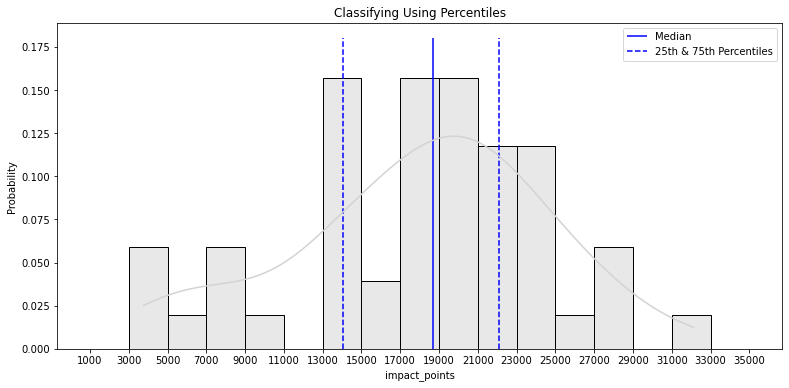

In [334]:
#explore classifying using percentiles
plt.figure(figsize=(13,6))
sns.histplot(states_df['impact_points'], kde=True, color='lightgrey', stat='probability',
             binwidth=2000, binrange=[1000,35000])
plt.vlines(x=median, ymin=0, ymax=.18, color='blue', label='Median')
plt.vlines(x=[q1, q3], ymin=0, ymax=.18, color='blue', label='25th & 75th Percentiles', linestyles='dashed')

plt.xticks(np.linspace(1000,35000,18))
plt.legend()
plt.title('Classifying Using Percentiles');

Defining categories by percentiles would group states such that 50% of states are considered "average," 25% of states are considered "high impact," and 25% of states are considered "low impact." In this approach, classes are evenly sorted. This is beneficial for modeling purposes, but may not draw realistic boundaries between Average-High and Low-Average. I reject this approach because it's reasonable to believe that the categories will naturally be imbalanced.

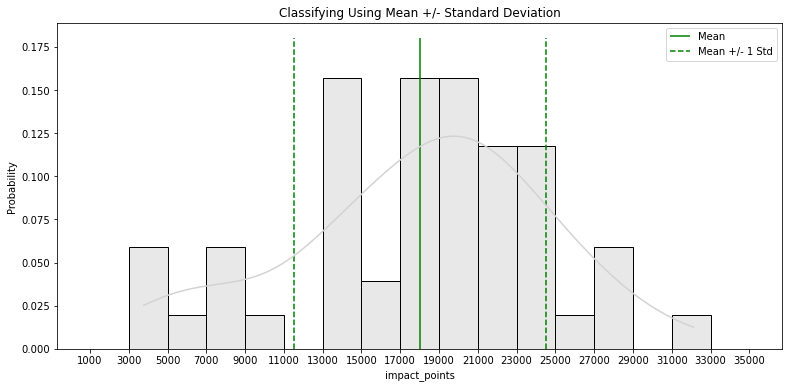

In [335]:
#explore classifying using mean +/- standard deviation
plt.figure(figsize=(13,6))
sns.histplot(states_df['impact_points'], kde=True, color='lightgrey', stat='probability',
             binwidth=2000, binrange=[1000,35000])

plt.vlines(x=mean, ymin=0, ymax=.18, color='green', label='Mean')
plt.vlines(x=[mean+std, mean-std], ymin=0, ymax=.18, color='green', 
           label='Mean +/- 1 Std', linestyles='dashed')

plt.xticks(np.linspace(1000,35000,18))
plt.legend()
plt.title('Classifying Using Mean +/- Standard Deviation');

Creating classes using the mean or median +/- standard deviations would use the distribution to calculate mean and standard deviation, but would draw boundaries between categories based on the point range rather than how the states are distributed within that range. This would allow for outliers or tails present in the distribution to be reflected as class imbalances.

+/- one standard deviation means 68.5% of the range of impact points are assigned as "average." This seems a bit high for defining "average," so let's look at a few scenarios using somewhere between .5-.8 of a standard deviation would look like.

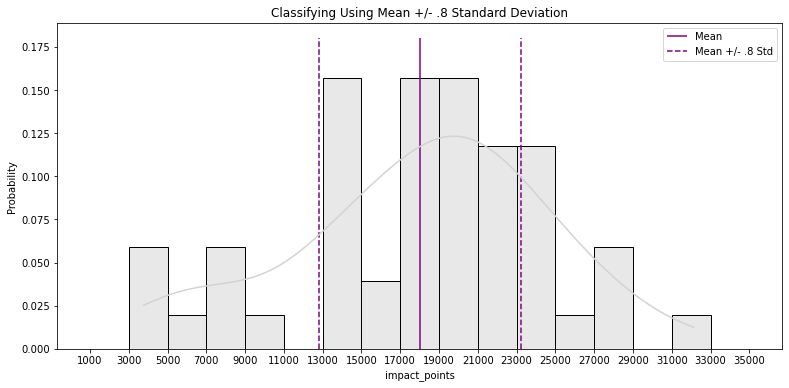

In [336]:
#explore classifying using mean +/- part of a standard deviation
plt.figure(figsize=(13,6))
sns.histplot(states_df['impact_points'], kde=True, color='lightgrey', stat='probability',
             binwidth=2000, binrange=[1000,35000])

plt.vlines(x=mean, ymin=0, ymax=.18, color='purple', label='Mean')
plt.vlines(x=[mean+(.8*std), mean-(.8*std)], ymin=0, ymax=.18, color='purple', 
           label='Mean +/- .8 Std', linestyles='dashed')

plt.xticks(np.linspace(1000,35000,18))
plt.legend()
plt.title('Classifying Using Mean +/- .8 Standard Deviation');

I feel most comfortable moving forward defining classes using .8 of a standard deviation.

In [337]:
def impact_category(df, col_name):
    '''
    Classifies numeric values into three categories of impact.
    
    Inputs:
    df - pd.DataFrame that is the source of data and destination of calculated field
    col_name = str, name of the column to segment. Must contain numeric values.
    
    Outputs:
    df with new "impact_category" column
    '''
    mean = df[col_name].mean()
    std = df[col_name].std()
    
    for i in range(0, len(df)):
        if df.loc[i, col_name] > mean+.8*std:
            df.loc[i, 'impact_category'] = '2-High'
            df.loc[i, 'impact_category_code'] = 2
        elif df.loc[i, col_name] < mean-.8*std:
            df.loc[i, 'impact_category'] = '0-Low'
            df.loc[i, 'impact_category_code'] = 0
        else:
            df.loc[i, 'impact_category'] = '1-Average'
            df.loc[i, 'impact_category_code'] = 1
    return df

In [338]:
impact_category(states_df, 'impact_points')

State    cases   deaths  \
11                HAWAII    36680    515.0   
45               VERMONT    24433    258.0   
1                 ALASKA    70774    360.0   
19                 MAINE    69118    860.0   
37                OREGON   209561   2812.0   
44                  UTAH   417330   2385.0   
47            WASHINGTON   455630   6011.0   
29         NEW HAMPSHIRE    99626   1373.0   
5               COLORADO   563067   6971.0   
12                 IDAHO   195506   2161.0   
50               WYOMING    62642    751.0   
27              NEBRASKA   224873   2521.0   
33        NORTH CAROLINA  1016742  13468.0   
46              VIRGINIA   681326  11434.0   
23             MINNESOTA   605896   7708.0   
49             WISCONSIN   678260   8144.0   
26               MONTANA   114059   1668.0   
48         WEST VIRGINIA   164279   2901.0   
4             CALIFORNIA  3824416  63715.0   
17              KENTUCKY   466718   7292.0   
25              MISSOURI   601072   9964.0   
20              MARYLAND   462898   9754.0   
8   DISTRICT OF COLUMBIA    49417   1141.0   
35                  OHIO  1112689  20344.0   
7               DELAWARE   109900   1695.0   
16                KANSAS   320070   5190.0   
9                FLORIDA  2337613  37985.0   
42             TENNESSEE   855377  12489.0   
36              OKLAHOMA   459524   7388.0   
43                 TEXAS  3000308  52656.0   
28                NEVADA   336109   5702.0   
15                  IOWA   374285   6148.0   
3               ARKANSAS   352095   5926.0   
40        SOUTH CAROLINA   598093   9841.0   
13              ILLINOIS  1397725  25727.0   
10               GEORGIA  1112339  20761.0   
34          NORTH DAKOTA   110782   1559.0   
14               INDIANA   759056  13884.0   
31            NEW MEXICO   205915   4348.0   
22              MICHIGAN   999498  21017.0   
32              NEW YORK  2100267  42745.0   
38          PENNSYLVANIA  1217567  27753.0   
41          SOUTH DAKOTA   124582   2038.0   
18             LOUISIANA   484577  10763.0   
0                ALABAMA   551298  11358.0   
6            CONNECTICUT   349651   8279.0   
24           MISSISSIPPI   322835   7425.0   
39          RHODE ISLAND   152698   2730.0   
2                ARIZONA   897910  18000.0   
21         MASSACHUSETTS   710428  18005.0   
30            NEW JERSEY  1024465  26477.0   

    CVAC level of concern for vaccination rollout  Percent Hispanic  \
11                                         0.3260            0.0960   
45                                         0.1971            0.0181   
1                                          0.7445            0.0531   
19                                         0.3119            0.0155   
37                                         0.5294            0.1210   
44                                         0.5072            0.0921   
47                                         0.4605            0.1445   
29                                         0.0970            0.0263   
5                                          0.3486            0.2013   
12                                         0.3875            0.1308   
50                                         0.5574            0.0830   
27                                         0.2368            0.0696   
33                                         0.6313            0.0733   
46                                         0.3080            0.0549   
23                                         0.3309            0.0457   
49                                         0.1715            0.0385   
26                                         0.3284            0.0316   
48                                         0.3933            0.0124   
4                                          0.6333            0.3062   
17                                         0.2717            0.0245   
25                                         0.7023            0.0292   
20                                         0.1704            0.0

In [339]:
#sort states by impact points, lowest to highest
states_df = states_df.copy().sort_values('impact_points')

Let's take a look at the distribution of classes.

In [340]:
px.bar(states_df, 'impact_category', hover_data=['State'], 
       title='Pandemic Impact Categories',
       labels={'impact_category': 'Impact Category', 'count': 'Number of States'})

# Data Visualization

In the next few cells, I'll explore correlations between various featurs and the impact of the pandemic on each state. I'll also plot each feature as a color-coded US state map and observe trends by geographic region.

In [355]:
plot_df = states_df.sort_values('impact_points')

#plot two subplots sharing x-axis
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,  
                    subplot_titles=['Cases per 100k', 'Deaths per 100k', 
                                    'COVID-19 Mortality (deaths/cases)', 
                                    'Calculated Impact Points'],
                    vertical_spacing=.1)

#plot cases per 100k on the first row
fig.add_bar(x=plot_df['State'], 
            y=plot_df['cases per 100k'], 
            row=1, col=1, 
            name='Cases per 100k', 
            marker=dict(color="rebeccapurple"))

#plot deaths per 100k on the second row
fig.add_bar(x=plot_df['State'], 
            y=plot_df['deaths per 100k'],
            row=2, col=1, 
            name='Deaths per 100k', 
            marker=dict(color="cornflowerblue"))

#plot mortality on third row
fig.add_bar(x=plot_df['State'], 
            y=plot_df['Percent of cases resulting in death'],
            row=3, col=1, name='COVID-19 Mortality (deaths/cases)', 
            marker=dict(color="darkslateblue"))

#plot impact points on fourth row
fig.add_bar(x=plot_df['State'], 
            y=plot_df['impact_points'],
            row=4, col=1, name='Calculated Impact Points (mortality*(1*cases + 3*deaths)', 
            marker=dict(color="cadetblue"))

#update title and size
fig.update_layout(height=800, width=1000, title='Population-Controlled COVID-19 Cases and Deaths',
                 showlegend=False)

#format x-axis labels
fig.update_xaxes(row=4, col=1, tickangle=45, tickfont_size=10)

#format y-axis labels
fig.update_yaxes(tickfont_size=10)

#save image
fig.write_image('./images/cases, deaths, mortality, and impact points.jpg')

fig.show()

In [342]:
#initialize a list of predictor features in order to loop through them
cols = list(states_df.columns)
#drop targets from the feature list
cols.remove('State')
cols.remove('state_abbr')
cols.remove('impact_category')
cols.remove('impact_points')
cols.remove('impact_category_code')
#drop raw case and death counts in favor of the population-controlled features
cols.remove('cases')
cols.remove('deaths')

## Box Plots - Feature Distributions for Low & High Impact States

Box plots show the overall distribution of data. Box plots with a color argument passed will show the distribution of groups within the overall dataset.

Below I'll visualize box plots of the distribution of each feature, split by low impact states and high impact states. The box plot will show if those two categories have significantly different distributions.

In [343]:
#for each column, save and show a box plot with high and low pandemic impact categories
for col in cols:
    name = f'{col.title()}'
    fig = px.box(states_df[states_df['impact_category'] != '1-Average'], 
                 x='impact_category', 
                 y=col, 
                 color='impact_category', 
                 color_discrete_map={'2-High':'red', '0-Low':'blue'},
                 labels={'impact_category': 'Impact Category'})
    fig.update_layout(height=500, width=600, title_text=name)
    fig.write_image(f'./images/boxplot_{col}_impactcat.jpg')
    fig.show()

Box plot observations:

**States with high pandemic impact...**

Demographics 
- ...have a larger black population
- ...have higher population and population density

Socioeconomics
- ...have higher poverty and unemployment rates, 
- ...have greater income inequality
- ...have a larger percentage of adults with low education achievement

Health Outcomes
- ...have greater number of premature deaths 
- ...have more preventable hospital stays 
- ...have more people per primary care physician

Healthy Behaviors
- ...have populations that are more likely to smoke and less likely to be physically active

Living Conditions
- ...have lower prevalence of broadband access 
- ...have more air pollution



## Scatterplots with Trendlines

Scatterplots with impact points on the x-axis will show possible linear correlations between a feature and pandemic impact. Features with observed correlations will likely help classification models make better predictions and represent the factors that may have a causal relationship with how a community is impacted by a pandemic.

In [344]:
#for each column, plot and save a scatter plot with x=impact_points
for col in cols:
    fig = px.scatter(states_df, x='impact_points', y=col, trendline='ols', title=col, 
                     trendline_color_override='black', hover_data=['State'])
    fig.update_layout(height=500, width=600)
    fig.write_image(f'images/scatter_{col}.jpg')
    fig.show()

ValueError: Could not convert value of 'y' into a numeric type.

Aside from the features used to calculate impact points, the following features appear to be correlated with impact of the pandemic:

- Poverty Rate
- Unemployment Rate
- Education (adults without hs diploma)
- Social Vulnerability Index scores - particularly socioeconomic and minority status & language
- Premature Deaths
- Population with Poor or Fair Health
- Physical Inactivity
- Preventable Hospital Stays
- Flu Vaccinations
- Life Expectancy
- Ratio of Population to Primary Care Physicians
- Broadband Access
- Air Pollution

## Choropleth Maps

Choropleth maps will also be helpful visualizations. Plotly's choropleth map has a built-in US states location mode which takes state abbreviations, so I'll need to add that back into my dataframe. This location mode does not require a geojson file.

In [356]:
#initialize and fill a dictionary opposite of what I used earlier
abbr_dict2 = {}
for i in range(0,len(abbr)):
    d = {abbr.State[i].upper(): abbr.Code[i]}
    abbr_dict2.update(d)
abbr_dict2

{'ALABAMA': 'AL',
 'ALASKA': 'AK',
 'ARIZONA': 'AZ',
 'ARKANSAS': 'AR',
 'CALIFORNIA': 'CA',
 'COLORADO': 'CO',
 'CONNECTICUT': 'CT',
 'DELAWARE': 'DE',
 'DISTRICT OF COLUMBIA': 'DC',
 'FLORIDA': 'FL',
 'GEORGIA': 'GA',
 'HAWAII': 'HI',
 'IDAHO': 'ID',
 'ILLINOIS': 'IL',
 'INDIANA': 'IN',
 'IOWA': 'IA',
 'KANSAS': 'KS',
 'KENTUCKY': 'KY',
 'LOUISIANA': 'LA',
 'MAINE': 'ME',
 'MARYLAND': 'MD',
 'MASSACHUSETTS': 'MA',
 'MICHIGAN': 'MI',
 'MINNESOTA': 'MN',
 'MISSISSIPPI': 'MS',
 'MISSOURI': 'MO',
 'MONTANA': 'MT',
 'NEBRASKA': 'NE',
 'NEVADA': 'NV',
 'NEW HAMPSHIRE': 'NH',
 'NEW JERSEY': 'NJ',
 'NEW MEXICO': 'NM',
 'NEW YORK': 'NY',
 'NORTH CAROLINA': 'NC',
 'NORTH DAKOTA': 'ND',
 'OHIO': 'OH',
 'OKLAHOMA': 'OK',
 'OREGON': 'OR',
 'PENNSYLVANIA': 'PA',
 'RHODE ISLAND': 'RI',
 'SOUTH CAROLINA': 'SC',
 'SOUTH DAKOTA': 'SD',
 'TENNESSEE': 'TN',
 'TEXAS': 'TX',
 'UTAH': 'UT',
 'VERMONT': 'VT',
 'VIRGINIA': 'VA',
 'WASHINGTON': 'WA',
 'WEST VIRGINIA': 'WV',
 'WISCONSIN': 'WI',
 'WYOMING': 'WY

In [357]:
# replace full state names with abbreviations
states_df['state_abbr'] = states_df.State.replace(abbr_dict2)

In [358]:
states_df.head()

State   cases  deaths  CVAC level of concern for vaccination rollout  \
11   HAWAII   36680   515.0                                         0.3260   
45  VERMONT   24433   258.0                                         0.1971   
1    ALASKA   70774   360.0                                         0.7445   
19    MAINE   69118   860.0                                         0.3119   
37   OREGON  209561  2812.0                                         0.5294   

    Percent Hispanic  Percent American Indian Alaska Native  Percent Asian  \
11            0.0960                                 0.0047         0.2893   
45            0.0181                                 0.0035         0.0099   
1             0.0531                                 0.3246         0.0539   
19            0.0155                                 0.0081         0.0079   
37            0.1210                                 0.0165         0.0168   

    Percent Black  Percent Native Hawaiian Pacific Islander  Percent White  \
11         0.0134                                    0.1314         0.2623   
45         0.0094                                    0.0004         0.9389   
1          0.0133                                    0.0053         0.4787   
19         0.0084                                    0.0003         0.9400   
37         0.0073                                    0.0033         0.8030   

    % Hesitant or Strongly Vaccine Hesitant  AREA_SQMI  population  \
11                                   0.0912       6422     1422029   
45                                   0.0620       9217      624977   
1                                    0.3743     570982      738516   
19                                   0.1743      30844     1332813   
37                                   0.1977      95987     4081943   

    housing units count  households count  population density (pop per sqmi)  \
11               539053            456782                             221.42   
45               333013            259589                              67.80   
1                315386            253462                               1.29   
19               739077            556955                              43.21   
37              1750539           1591835                              42.53   

    per capita income  poverty rate  unemployment rate  \
11           35526.00         10.82               3.72   
45           31966.00         11.27               4.24   
1            32531.21         13.32               9.41   
19           28983.25         13.78               5.22   
37           27690.11         15.25               6.82   

    % adults without hs diploma  % population >65  % population <17  \
11                         9.02             17.58             18.54   
45                         8.21             19.46             19.01   
1                          9.79             11.80             24.54   
19                         8.36             21.12             18.76   
37                        11.11             21.07             20.75   

    SVI socioeconomic ranking  \
11                       0.18   
45                       0.20   
1                        0.39   
19                       0.35   
37                       0.51   

    SVI household composition and disability ranking  \
11                                              0.15   
45                                              0.31   
1                                               0.37   
19                                              0.45   
37                                              0.56   

    SVI minority status and language ranking  \
11                                      0.95   
45                                      0.18   
1                                       0.69   
19                                      0.19   
37                                      0.58   

    SVI housing type and transportation ranking  SVI overall ranking  \
11                      

In [359]:
def us_states_mapplot(df, color, contin=True, title=None, hover_data=None, save=False, 
                      color_sequence='Dark2', color_map=None):
    '''
    US map color-coded by state by given feature
    
    Inputs:
    df - pd.DataFrame containing source data. Must contain a column called 'state_abbr' containing the 
            two-letter abbreviations for each state.
    color - str, column by which to color-code
    contin (default=True) - boolean, whether or not the color feature is continuous. 
                            False indicates discrete values
    title (default=None) - str, title for graph
    hover_data (default=None) - list, columns in df to display when hovering over a state
    save (default=False) - boolean, whether or not to save the image as a file in 'images' folder
    color_sequence (default='Dark2') - str or list, if contin=False, colors for discrete values 
                                       in format ['color1', 'color2', 'color n']
    color_map (default=None) - dict, if contin=False, colors for discrete values in format {'value': 'color'}
    
    Outputs:
    Plotly choropleth map and optional saved image
    '''
    if contin == True:
        
        fig = px.choropleth(data_frame=df, locations=df['state_abbr'], locationmode='USA-states', 
                            scope='usa', color=color, color_continuous_scale='balance', 
                            hover_data=hover_data, title=title)
    else:
        fig = px.choropleth(data_frame=df, locations=df['state_abbr'], locationmode='USA-states', 
                            scope='usa', hover_data=hover_data, title=title,
                            color=color, color_discrete_sequence=color_sequence, color_discrete_map=color_map)
        
    if save == True:
        fig.write_image(f'images/map_{title}.jpg')
    fig.show()

In [360]:
#map impact points
title = 'Impact of COVID-19 Pandemic by State - Points'
hover_data=['State', 'impact_category', 'cases per 100k', 'deaths per 100k']

us_states_mapplot(states_df, 'impact_points', hover_data=hover_data, title=title, save=True)

In [361]:
#map impact category
title='Impact of COVID-19 Pandemic by State - Category'
color_map={'0-Low': 'darkslateblue', '1-Average': 'linen', '2-High': 'brown'}

us_states_mapplot(states_df, 'impact_category', contin=False, color_map=color_map, title=title, save=True)

In [369]:
# print the high impact states and low impact states
high = list(states_df.State[states_df['impact_category'] == '2-High'])
high_title = []
for item in high:
    high_title.append(item.title())
print(f'High-Impact States: {high_title}')

low = list(states_df.State[states_df['impact_category'] == '0-Low'])
low_title = []
for item in low:
    low_title.append(item.title())
print(f'Low-Impact States: {low_title}')

High-Impact States: ['Louisiana', 'South Dakota', 'Connecticut', 'Alabama', 'Mississippi', 'Rhode Island', 'Arizona', 'Massachusetts', 'New Jersey']
Low-Impact States: ['Hawaii', 'Vermont', 'Alaska', 'Maine', 'Oregon', 'Utah', 'Washington', 'New Hampshire']


In [ ]:
high = list(states_df.State[states_df['impact_category'] == '2-High'])
high_title = []
for item in high:
    high_title.append(item.title())
high_title

In [363]:
#map all other features, review and observe findings
for col in cols:
    name = f'{col.title()}'
    us_states_mapplot(states_df, col, title=name, hover_data=hover_data, save=True)

Map observations:
- The midwest and northeast have low concern for vaccination rollout and low social vulnerability compared to the west and south
- Vaccine hesitancy is concentrated in the south, Montana/Idaho/Wyoming, and Alaska. The same areas have the highest % population uninsured.
- The south has higher poverty rates, and the south and west have higher unemployment and lower education than elsewhere in the country
- The south has significantly higher rates of poor/fair health, more preventable hospital stays, higher prevalence of smoking, obesity, and physical activity, and lower life expectancy by up to 7 years than elsewhere in the country



# Save Dataset

I'll now save the merged dataset with engineered features as a csv file and move into a different notebook for modeling so that I can update either the modeling data or the modeling workflow separately without breaking the other.

In [364]:
states_df.to_csv('data/merged_state_level_dataset.csv', index=False)

# Appendix

In [366]:
states_df['cases'].sum()

33471979

In [367]:
states_df['deaths'].sum()

592400.0

In [368]:
states_df['Percent of cases resulting in death'].mean()

1.6582224417714722